# Name: Paavani Ramakrishna
# Git Username: paavani2000
# USC id: 7696462483

# 1.Time Series Classification Part 1: Feature Creation/Extraction

a) Download the AReM data from:
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file contains 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, avg rss23, and var rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from beautifultable import BeautifulTable

In [3]:
pip install bootstrapped

In [4]:
pip install beautifultable

In [5]:
import warnings
warnings.filterwarnings("ignore")

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [6]:
activity_types = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
sensor_columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
extracted_features = []
train_limits = [7, 6, 15, 15, 15, 15, 15]
test_limits = [2, 2, 3, 3, 3, 3, 3]

def load_dataset(file_location):
    parsed_data = []
    with open(file_location, 'r') as file_input:
        row_counter = 1
        for row in file_input:
            if row_counter <= 5:
                row_counter += 1
                continue
            else:
                split_row = row.split(',')
                if len(split_row) == 1:
                    split_row = row.split(' ')
                for idx in range(1, len(split_row)):
                    split_row[idx] = split_row[idx].replace('\n', '')
                    split_row[idx] = split_row[idx].strip()
                    if len(split_row[idx]) == 0:
                        split_row.pop(idx)
                        continue
                    split_row[idx] = float(split_row[idx])
                parsed_data.append(split_row[1:])
    
    parsed_data = pd.DataFrame(parsed_data, columns=sensor_columns)
    return parsed_data

dataset_mapping = {}
for type_index in range(len(activity_types)):
    for instance_idx in range(1, train_limits[type_index] + 1):
        dataset_path = f'AReM/{activity_types[type_index]}/dataset{instance_idx}.csv'
        full_path = f'../Data/{dataset_path}'
        dataset_mapping[dataset_path] = load_dataset(full_path)

In [7]:
train_data_storage = {}

for type_index in range(len(activity_types)):
    start_idx = test_limits[type_index] + 1
    end_idx = train_limits[type_index]
    for inst_num in range(start_idx, end_idx + 1):
        dataset_name = f'AReM/{activity_types[type_index]}/dataset{inst_num}.csv'
        train_data_storage[dataset_name] = dataset_mapping[dataset_name]

for data_path, data_frame in train_data_storage.items():
    print('<=======================================>')
    print('Dataset Name:', data_path)
    print('<=======================================>')
    print('Total Rows:', len(data_frame))
    print('<=======================================>')
    print('Total Columns:', len(data_frame.columns))
    print('<=======================================>')
    print('First 5 Rows:')
    print('<=======================================>')
    print(data_frame.head())
    print()

<=======================================>
Dataset Name: AReM/bending1/dataset3.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      42.00       0.71      21.25       0.43      30.00       0.00
1      41.50       0.50      20.25       1.48      31.25       1.09
2      41.50       0.50      14.25       1.92      33.00       0.00
3      40.75       0.83      15.75       0.43      33.00       0.00
4      40.00       0.71      20.00       2.74      32.75       0.43

<=======================================>
Dataset Name: AReM/bending1/dataset4.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<====================================

Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      35.75       1.79      21.00       2.45      20.50       0.50
1      38.75       1.48      17.00       4.32      19.67       2.05
2      41.67       0.47      15.75       5.12      20.33       5.19
3      41.67       0.47      12.00       3.67      15.00       7.07
4      35.00       2.83      21.67       5.56      27.00       2.12

<=======================================>
Dataset Name: AReM/cycling/dataset15.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       32.0       4.85      17.50       3.35      2

4      42.00       0.00      20.33       0.47      21.00       0.00

<=======================================>
Dataset Name: AReM/sitting/dataset10.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       42.0        0.0      21.00       0.00      15.00       1.00
1       42.0        0.0      21.00       0.00      18.00       0.00
2       42.0        0.0      20.75       0.43      17.75       0.43
3       42.0        0.0      20.25       0.43      18.25       1.09
4       42.0        0.0      20.00       0.00      18.00       0.00

<=======================================>
Dataset Name: AReM/sitting/dataset11.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================

4      40.00       0.82      13.25       5.80      21.00       2.94

<=======================================>
Dataset Name: AReM/walking/dataset6.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      39.00       6.48      12.67       0.94      17.67       1.25
1      31.75       2.49      16.25       5.31      17.00       2.24
2      34.00       2.83      16.33       3.40      16.33       1.25
3      38.50       6.06      18.00       2.12      14.25       3.56
4      28.00       4.06      17.50       1.80      19.50       2.06

<=======================================>
Dataset Name: AReM/walking/dataset7.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=========================

In [8]:
test_data_storage = {}

for activity_idx in range(0, len(activity_types)):
    start_idx = 1
    end_idx = test_limits[activity_idx]
    for instance_idx in range(start_idx, end_idx + 1):
        dataset_name = 'AReM' + '/' + activity_types[activity_idx] + '/dataset' + str(instance_idx) + '.csv'
        test_data_storage[dataset_name] = dataset_mapping[dataset_name]

for data_path, data_frame in test_data_storage.items():
    print('<=======================================>')
    print('Dataset Name:', data_path)
    print('<=======================================>')
    print('Total Rows:', len(data_frame))
    print('<=======================================>')
    print('Total Columns:', len(data_frame.columns))
    print('<=======================================>')
    print('First 5 Rows:')
    print('<=======================================>')
    print(data_frame.head())
    print()


<=======================================>
Dataset Name: AReM/bending1/dataset1.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<=======================================>
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      39.25       0.43      22.75       0.43      33.75        1.3
1      39.25       0.43      23.00       0.00      33.00        0.0
2      39.25       0.43      23.25       0.43      33.00        0.0
3      39.50       0.50      23.00       0.71      33.00        0.0
4      39.50       0.50      24.00       0.00      33.00        0.0

<=======================================>
Dataset Name: AReM/bending1/dataset2.csv
<=======================================>
Total Rows: 480
<=======================================>
Total Columns: 6
<=======================================>
First 5 Rows:
<====================================

# (c) Feature Extraction: Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly. Where, for example, 1st quart6 means the first quartile of the sixth time series in each of the 88 instances.

In [9]:
time_series_features = []
for dataset_path, data_frame in dataset_mapping.items():
    activity_type = dataset_path.split('/')[1]
    stats_summary = data_frame.describe()
    stats_dict = {
        'Mean': stats_summary.loc['mean'].tolist(),
        'Std': stats_summary.loc['std'].tolist(),
        'Median': stats_summary.loc['50%'].tolist(),
        'Min': stats_summary.loc['min'].tolist(),
        'Max': stats_summary.loc['max'].tolist(),
        'FirstQuartile': stats_summary.loc['25%'].tolist(),
        'ThirdQuartile': stats_summary.loc['75%'].tolist(),
    }

    if not extracted_features:
        for col in sensor_columns:
            extracted_features.extend([
                f'Min_{col}', f'Max_{col}', f'Mean_{col}',
                f'Median_{col}', f'Std_{col}', f'FirstQuartile_{col}',
                f'ThirdQuartile_{col}',
            ])

    row_data = []
    for col in sensor_columns:
        row_data.extend([
            stats_dict['Min'][sensor_columns.index(col)],
            stats_dict['Max'][sensor_columns.index(col)],
            stats_dict['Mean'][sensor_columns.index(col)],
            stats_dict['Median'][sensor_columns.index(col)],
            stats_dict['Std'][sensor_columns.index(col)],
            stats_dict['FirstQuartile'][sensor_columns.index(col)],
            stats_dict['ThirdQuartile'][sensor_columns.index(col)],
        ])

    row_data.append(activity_type)
    time_series_features.append(row_data)

time_series_columns = extracted_features[:]
time_series_columns.append('Activity')
time_series_data = pd.DataFrame(time_series_features, columns=time_series_columns)

print('<===============================================>')
print('Total Observations in Time-Series Feature Data:', len(time_series_data))
print('<===============================================>')
print('Total Features in Time-Series Feature Data:', len(extracted_features))
print('<===============================================>')
print('First 5 Observations in Time-Series Feature Data:')
print('<===============================================>')
print(time_series_data[extracted_features].head())


<===============================================>
Total Observations in Time-Series Feature Data: 88
<===============================================>
Total Features in Time-Series Feature Data: 42
<===============================================>
First 5 Observations in Time-Series Feature Data:
<===============================================>
   Min_avg_rss12  Max_avg_rss12  Mean_avg_rss12  Median_avg_rss12  \
0          37.25          45.00       40.624792             40.50   
1          38.00          45.67       42.812812             42.50   
2          35.00          47.40       43.954500             44.33   
3          33.00          47.75       42.179813             43.50   
4          33.00          45.75       41.678063             41.75   

   Std_avg_rss12  FirstQuartile_avg_rss12  ThirdQuartile_avg_rss12  \
0       1.476967                    39.25                    42.00   
1       1.435550                    42.00                    43.67   
2       1.558835           

iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

In [10]:
from beautifultable import BeautifulTable
time_series_stats = time_series_data[extracted_features].describe()
standard_devs = time_series_stats[2:3].values[0].tolist()
headers = ['FEATURE NAME', 'STANDARD DEVIATION']
table_content = []

for idx in range(len(extracted_features)):
    row_data = [extracted_features[idx], standard_devs[idx]]
    table_content.append(row_data)

print('Standard Deviation of Time-Series Features are as follows:')
formatted_table = BeautifulTable(max_width=100)
formatted_table.set_style(BeautifulTable.STYLE_SEPARATED)

if headers:
    formatted_table.column_headers = headers

for row in range(len(table_content)):
    formatted_table.append_row(table_content[row])

print(formatted_table)

Standard Deviation of Time-Series Features are as follows:
+=========================+====================+
|      FEATURE NAME       | STANDARD DEVIATION |
+=========================+====================+
|      Min_avg_rss12      |        9.57        |
+-------------------------+--------------------+
|      Max_avg_rss12      |       4.394        |
+-------------------------+--------------------+
|     Mean_avg_rss12      |       5.336        |
+-------------------------+--------------------+
|    Median_avg_rss12     |        5.44        |
+-------------------------+--------------------+
|      Std_avg_rss12      |       1.772        |
+-------------------------+--------------------+
| FirstQuartile_avg_rss12 |       6.154        |
+-------------------------+--------------------+
| ThirdQuartile_avg_rss12 |       5.139        |
+-------------------------+--------------------+
|      Min_var_rss12      |        0.0         |
+-------------------------+--------------------+
|      Max

In [11]:
table_data_bootstrap = []
for p in range(len(extracted_features)):
    tuples = []
    samples = np.array(time_series_data[extracted_features[p]])
    boot_result = bs.bootstrap(samples, stat_func=bs_stats.std, alpha=0.1)
    tuples.append(extracted_features[p])
    tuples.append(standard_devs[p])
    tuples.append(boot_result.lower_bound)
    tuples.append(boot_result.upper_bound)
    table_data_bootstrap.append(tuples)

print('Standard Deviation along with 90% Confidence Interval of Time Domain Features are as follows:')
table_header_bootstrap = ['FEATURE NAME', 'STANDARD DEVIATION', 'LOWER BOUND', 'UPPER BOUND']
new_table_bootstrap = BeautifulTable(max_width=100)
new_table_bootstrap.set_style(BeautifulTable.STYLE_SEPARATED)

if table_header_bootstrap:
    new_table_bootstrap.column_headers = table_header_bootstrap

for t in range(len(table_data_bootstrap)):
    new_table_bootstrap.append_row(table_data_bootstrap[t])

print(new_table_bootstrap)


Standard Deviation along with 90% Confidence Interval of Time Domain Features are as follows:
+=========================+====================+=============+=============+
|      FEATURE NAME       | STANDARD DEVIATION | LOWER BOUND | UPPER BOUND |
+=========================+====================+=============+=============+
|      Min_avg_rss12      |        9.57        |    8.305    |   10.804    |
+-------------------------+--------------------+-------------+-------------+
|      Max_avg_rss12      |       4.394        |    3.479    |    5.428    |
+-------------------------+--------------------+-------------+-------------+
|     Mean_avg_rss12      |       5.336        |    4.769    |    5.939    |
+-------------------------+--------------------+-------------+-------------+
|    Median_avg_rss12     |        5.44        |    4.838    |    6.044    |
+-------------------------+--------------------+-------------+-------------+
|      Std_avg_rss12      |       1.772        |    1.583  

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

When tackling this regression problem, it's crucial to focus on time-domain features that offer the clearest separation and distinct distributions. Features that exhibit strong delineation between different data points will be the most valuable, as they can help improve model performance and interpretability.

Here are the three features that stand out as the most important:

- Maximum and Minimum Values (Extremes)
These features define the range of the data and help identify outliers or significant deviations. Maximum values capture peaks, while minimum values highlight the lowest points—both of which can significantly influence a dataset’s behavior. In many real-world scenarios, extreme values often indicate important events or patterns that shouldn’t be overlooked.

- Mean (Central Tendency)
The mean represents the average value, providing a sense of where most data points are concentrated. Understanding the mean helps paint a broader picture of the dataset, offering insights into its overall trend. Especially in regression, knowing the average behavior of a variable is crucial for making accurate predictions.

- Standard Deviation (Variability & Dispersion)
Standard deviation measures how spread out the data points are around the mean. A higher standard deviation signals greater variability, meaning data points fluctuate more significantly, while a lower standard deviation suggests a more stable trend.
This feature is essential for understanding the consistency of the data—whether it’s tightly clustered or scattered across a wide range.

- Meadian 
The median provides another measure of central tendency by identifying the middle value in a sorted dataset. Unlike the mean, it is not affected by outliers, making it particularly useful for skewed distributions. This robust indicator helps capture the central trends and complements the information given by other features like the mean and range.


By focusing on extremes (max/min), central tendency (mean), variability (std deviation),and median, we gain a well-rounded understanding of the dataset. These features not only help in regression modeling but also provide interpretable insights that can be used for decision-making.

# 2. Time Series Classification Part 2: Binary and Multiclass Classification

# (a) Binary Classification Using Logistic Regression

i.Assume that you want to use the training set to classify *bending* from other activities, i.e., you have a binary classification problem. Depict scatter plots of the features you specified in **1(c)iv** extracted from time series 1, 2, and 6 of each instance, and use color to distinguish *bending* vs. other activities. (See p. 129 of the textbook for reference).


Selected Stats: ['Mean', 'Median', 'Std']
Features to Extract (indices): [1, 2, 6]

Stats for AReM/bending1/dataset3.csv: {'Mean': [43.95449999999998, 0.4262500000000008, 22.122354166666664, 0.49731250000000127, 35.58845833333335, 0.4932916666666676], 'Std': [1.558835066353028, 0.33869037350107334, 3.0309428037022657, 0.5506572901546093, 1.9996040626699223, 0.5135061012349963], 'Median': [44.33, 0.47, 23.0, 0.43, 36.0, 0.43], 'Min': [35.0, 0.0, 6.5, 0.0, 29.0, 0.0], 'Max': [47.4, 1.7, 29.75, 4.44, 38.5, 1.79], 'FirstQuartile': [43.0, 0.0, 19.75, 0.0, 35.3625, 0.0], 'ThirdQuartile': [45.0, 0.5, 24.0, 0.83, 36.5, 0.94]}
Row for AReM/bending1/dataset3.csv: [43.95449999999998, 0.4262500000000008, 0.4932916666666676, 44.33, 0.47, 0.43, 1.558835066353028, 0.33869037350107334, 0.5135061012349963, 'bending']

Stats for AReM/bending1/dataset4.csv: {'Mean': [42.17981250000002, 0.6960416666666683, 22.183625, 0.9899166666666691, 33.493916666666664, 0.6135208333333356], 'Std': [3.670665660998427, 0


Stats for AReM/cycling/dataset8.csv: {'Mean': [36.95745833333332, 2.4200833333333316, 15.313416666666667, 2.7841458333333318, 15.989166666666666, 2.934625], 'Std': [3.4348626794462622, 1.724901374849458, 3.034030094638235, 1.542971572340688, 2.8516731588927975, 1.6313801248302064], 'Median': [36.29, 2.05, 15.25, 2.565, 16.33, 2.525], 'Min': [26.25, 0.0, 7.0, 0.0, 2.0, 0.0], 'Max': [44.25, 8.64, 26.5, 8.06, 22.25, 8.34], 'FirstQuartile': [34.5, 1.25, 13.25, 1.58, 14.0, 1.66], 'ThirdQuartile': [40.25, 3.35, 17.33, 3.77, 18.25, 4.03]}
Row for AReM/cycling/dataset8.csv: [36.95745833333332, 2.4200833333333316, 2.934625, 36.29, 2.05, 2.525, 3.4348626794462622, 1.724901374849458, 1.6313801248302064, 'non-bending']

Stats for AReM/cycling/dataset9.csv: {'Mean': [37.144833333333324, 2.4190625, 14.998479166666668, 2.849624999999999, 16.773520833333336, 2.8224374999999995], 'Std': [3.7589039141812752, 1.6431745829561357, 3.2895371522410652, 1.7151848732044337, 2.6892905793209434, 1.6371826761493


Stats for AReM/lying/dataset9.csv: {'Mean': [47.32512499999999, 0.2743125000000004, 9.5319375, 0.7857291666666679, 14.299125, 0.7661666666666685], 'Std': [5.961280283196093, 0.5627289107405945, 3.987097588185423, 0.8116360764841972, 4.142132425235064, 0.7239530582982194], 'Median': [42.67, 0.0, 10.75, 0.5, 14.0, 0.5], 'Min': [39.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Max': [56.25, 8.49, 18.25, 5.72, 21.0, 5.72], 'FirstQuartile': [42.0, 0.0, 6.0, 0.43, 11.75, 0.43], 'ThirdQuartile': [54.0, 0.47, 12.75, 1.0, 18.0, 1.0]}
Row for AReM/lying/dataset9.csv: [47.32512499999999, 0.2743125000000004, 0.7661666666666685, 42.67, 0.0, 0.5, 5.961280283196093, 0.5627289107405945, 0.7239530582982194, 'non-bending']

Stats for AReM/lying/dataset10.csv: {'Mean': [27.716375000000003, 0.363687500000001, 6.07810416666667, 0.8700416666666683, 8.337020833333336, 0.7353958333333342], 'Std': [1.4422534360867243, 0.3948170822604771, 3.4686550415196753, 0.7774195836973832, 4.074453545027606, 0.6128337355731223], 'Median'

Stats for AReM/sitting/dataset13.csv: {'Mean': [42.28266666666666, 0.4983541666666669, 9.469541666666666, 0.8996458333333345, 12.537187499999998, 0.8690000000000008], 'Std': [1.3561489029244784, 0.14798436829700853, 5.313779640636361, 0.8361940817552831, 6.0397968801176845, 0.7942125207925874], 'Median': [41.5, 0.5, 10.0, 0.82, 12.0, 0.82], 'Min': [39.67, 0.0, 0.0, 0.0, 0.0, 0.0], 'Max': [44.75, 1.0, 22.75, 5.68, 23.25, 7.85], 'FirstQuartile': [41.5, 0.47, 5.0, 0.43, 8.5, 0.47], 'ThirdQuartile': [44.33, 0.5, 14.0, 1.25, 18.25, 1.0]}
Row for AReM/sitting/dataset13.csv: [42.28266666666666, 0.4983541666666669, 0.8690000000000008, 41.5, 0.5, 0.82, 1.3561489029244784, 0.14798436829700853, 0.7942125207925874, 'non-bending']

Stats for AReM/sitting/dataset14.csv: {'Mean': [42.36018749999998, 0.4825000000000015, 12.884541666666669, 0.6200625000000008, 15.260437500000002, 0.7198125000000014], 'Std': [1.0173715397767942, 0.24638852832336394, 4.01288386951872, 0.7479470833617813, 6.46678554283702


Stats for AReM/walking/dataset5.csv: {'Mean': [34.76333333333333, 4.223791666666666, 15.239020833333335, 3.2070624999999984, 16.2995625, 3.2882708333333333], 'Std': [4.74220808365667, 2.2780044279205445, 2.9208286065846374, 1.5904718632064376, 3.1746807602150713, 1.6475277010299703], 'Median': [35.29, 3.9, 15.33, 3.0, 16.25, 3.27], 'Min': [20.75, 0.0, 5.0, 0.0, 6.0, 0.0], 'Max': [46.25, 12.68, 23.75, 9.2, 25.5, 9.39], 'FirstQuartile': [31.67, 2.49, 13.5, 2.05, 14.25, 2.05], 'ThirdQuartile': [38.25, 5.7225, 17.25, 4.195, 18.33, 4.305]}
Row for AReM/walking/dataset5.csv: [34.76333333333333, 4.223791666666666, 3.2882708333333333, 35.29, 3.9, 3.27, 4.74220808365667, 2.2780044279205445, 1.6475277010299703, 'non-bending']

Stats for AReM/walking/dataset6.csv: {'Mean': [34.935812500000004, 4.115749999999996, 15.524520833333332, 3.0927916666666633, 15.997229166666665, 3.280020833333331], 'Std': [4.6459444867043596, 2.3352426212727377, 2.900248239966241, 1.5034457702438166, 3.19205780277653, 1

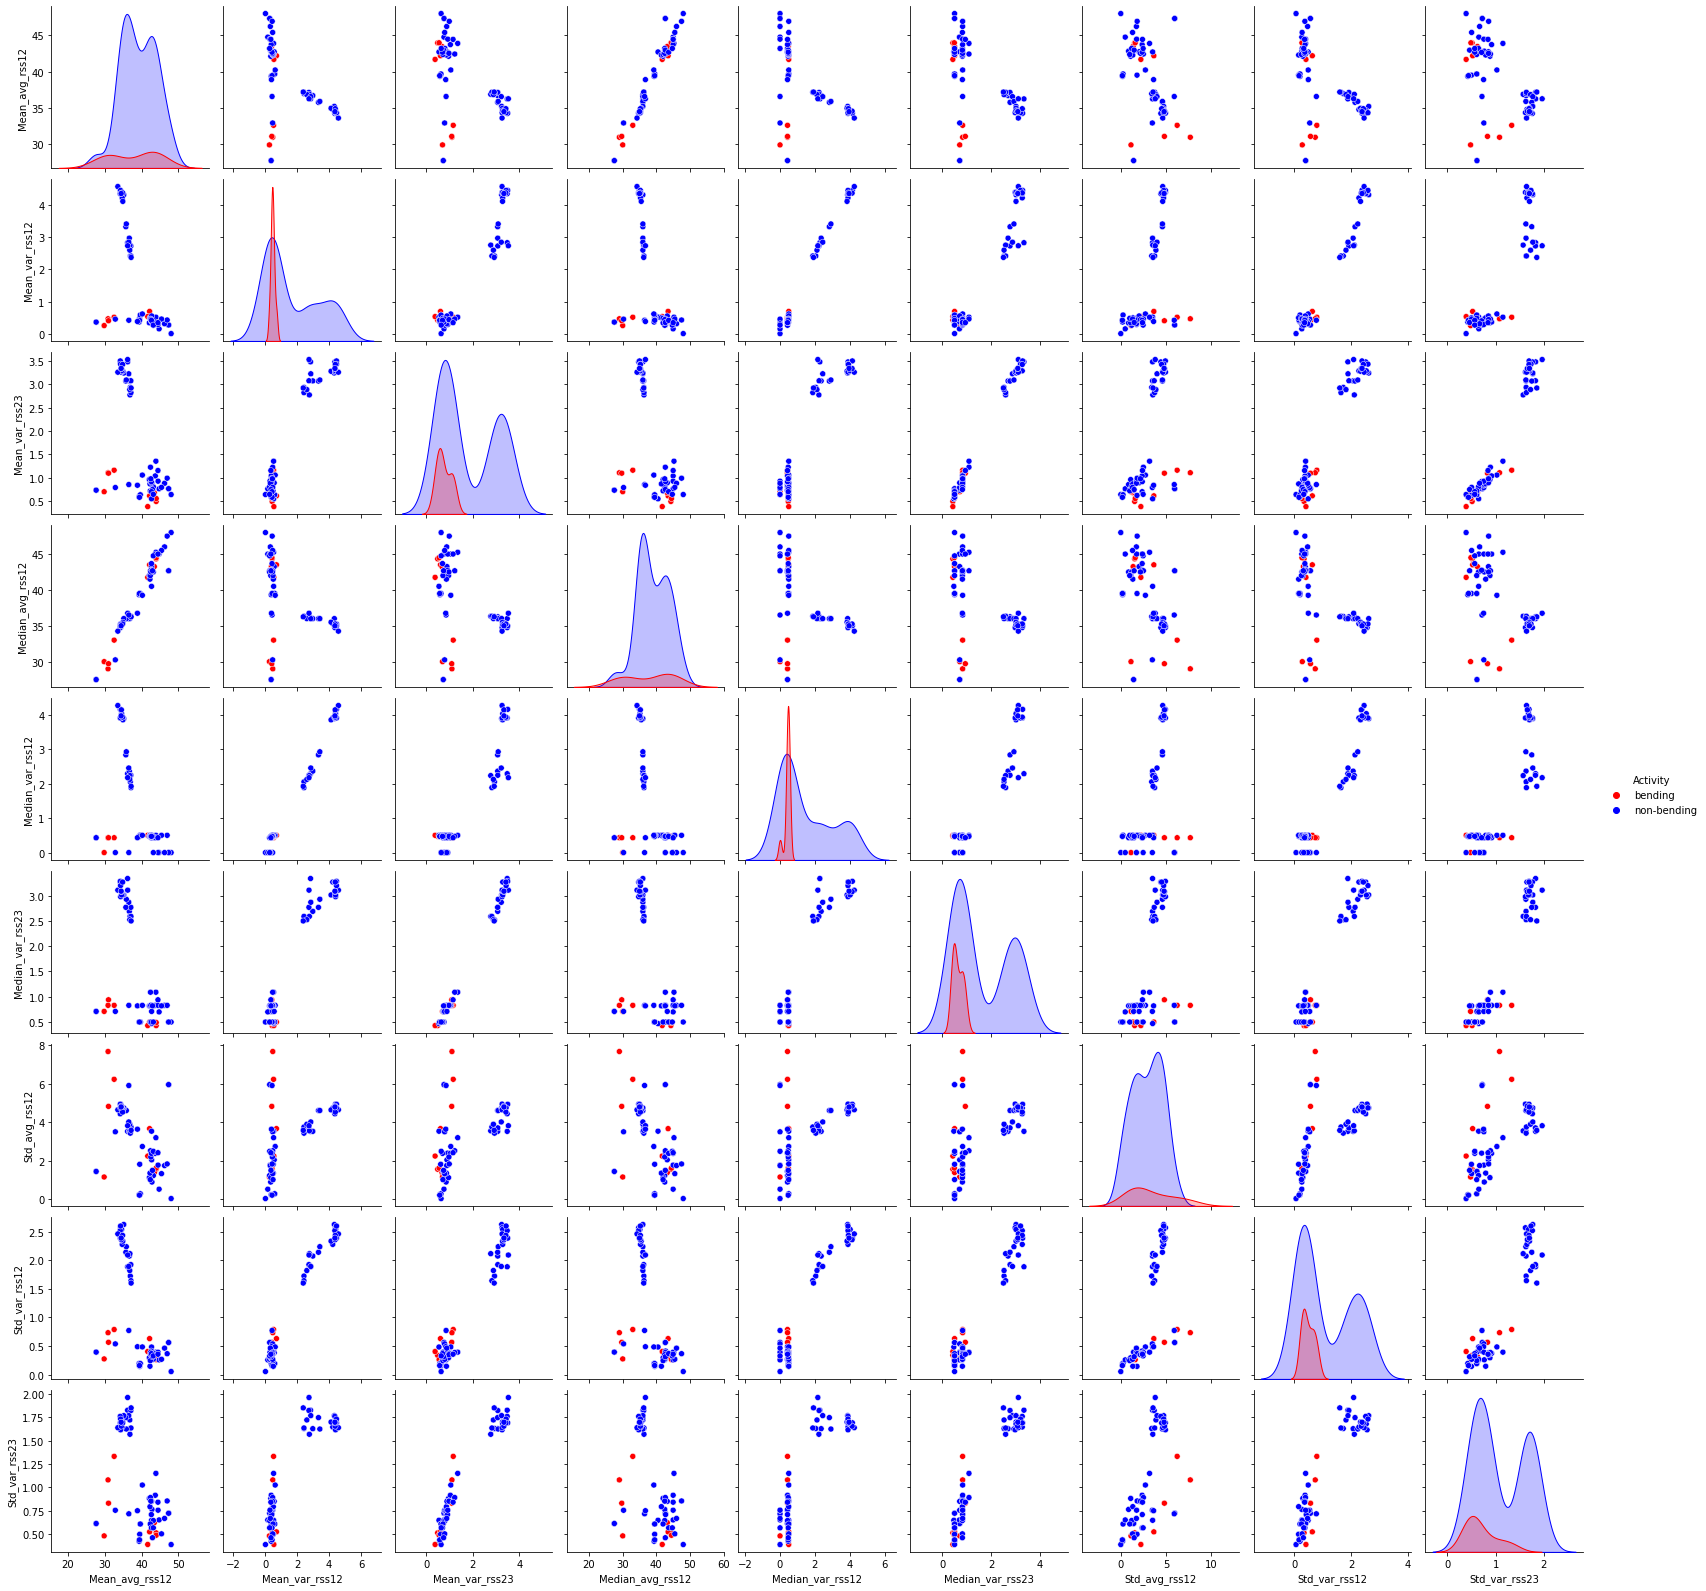

In [12]:
import seaborn as sbn
selected_stats = ['Mean', 'Median', 'Std']
stats_to_extract = [1, 2, 6]
features_for_plot = []
train_data_records = []

# Debugging: Print the selected features and features to extract
print("Selected Stats:", selected_stats)
print("Features to Extract (indices):", stats_to_extract)

# Process the training data
for dataset_path, data_frame in train_data_storage.items():
    activity_type = dataset_path.split('/')[1]
    stats_summary = data_frame.describe()
    stats_dict = {
        'Mean': stats_summary[1:2].values[0].tolist(),
        'Std': stats_summary[2:3].values[0].tolist(),
        'Median': stats_summary[5:6].values[0].tolist(),
        'Min': stats_summary[3:4].values[0].tolist(),
        'Max': stats_summary[7:8].values[0].tolist(),
        'FirstQuartile': stats_summary[4:5].values[0].tolist(),
        'ThirdQuartile': stats_summary[6:7].values[0].tolist()
    }
    # Debugging: Print the statistics for the current data
    print(f"\nStats for {dataset_path}: {stats_dict}")
    
    row_data = []
    for stat_feature in selected_stats:
        stat_values = stats_dict[stat_feature]
        for idx in range(0, 6):
            if (idx + 1) in stats_to_extract:
                if len(features_for_plot) < len(selected_stats) * len(stats_to_extract):
                    features_for_plot.append(stat_feature + '_' + sensor_columns[idx])
                row_data.append(stat_values[idx])
    
    # Label the activity
    if activity_type == 'bending1' or activity_type == 'bending2':
        row_data.append('bending')
    else:
        row_data.append('non-bending')
    
    # Debugging: Print the row before adding to DataFrame
    print(f"Row for {dataset_path}: {row_data}")
    
    train_data_records.append(row_data)

# Add the 'Activity' column to features for the plot
features_for_plot.append('Activity')

# Create the DataFrame
train_data_df = pd.DataFrame(train_data_records, columns=features_for_plot)

# Debugging: Print the first few rows of the DataFrame
print("\nFinal Training Data (first few rows):")
print(train_data_df.head())

# Plot using seaborn pairplot
sbn.pairplot(data=train_data_df, hue='Activity', palette={'bending':'red', 'non-bending':'blue'})


ii. Break each time series in your training set into two (approximately) equal-length time series. Now, instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment from 2(a)i, i.e., depict scatter plots of the features extracted from both parts of time series 1, 2, and 6. Compare the results with those of 2(a)i. Do you notice any significant differences?

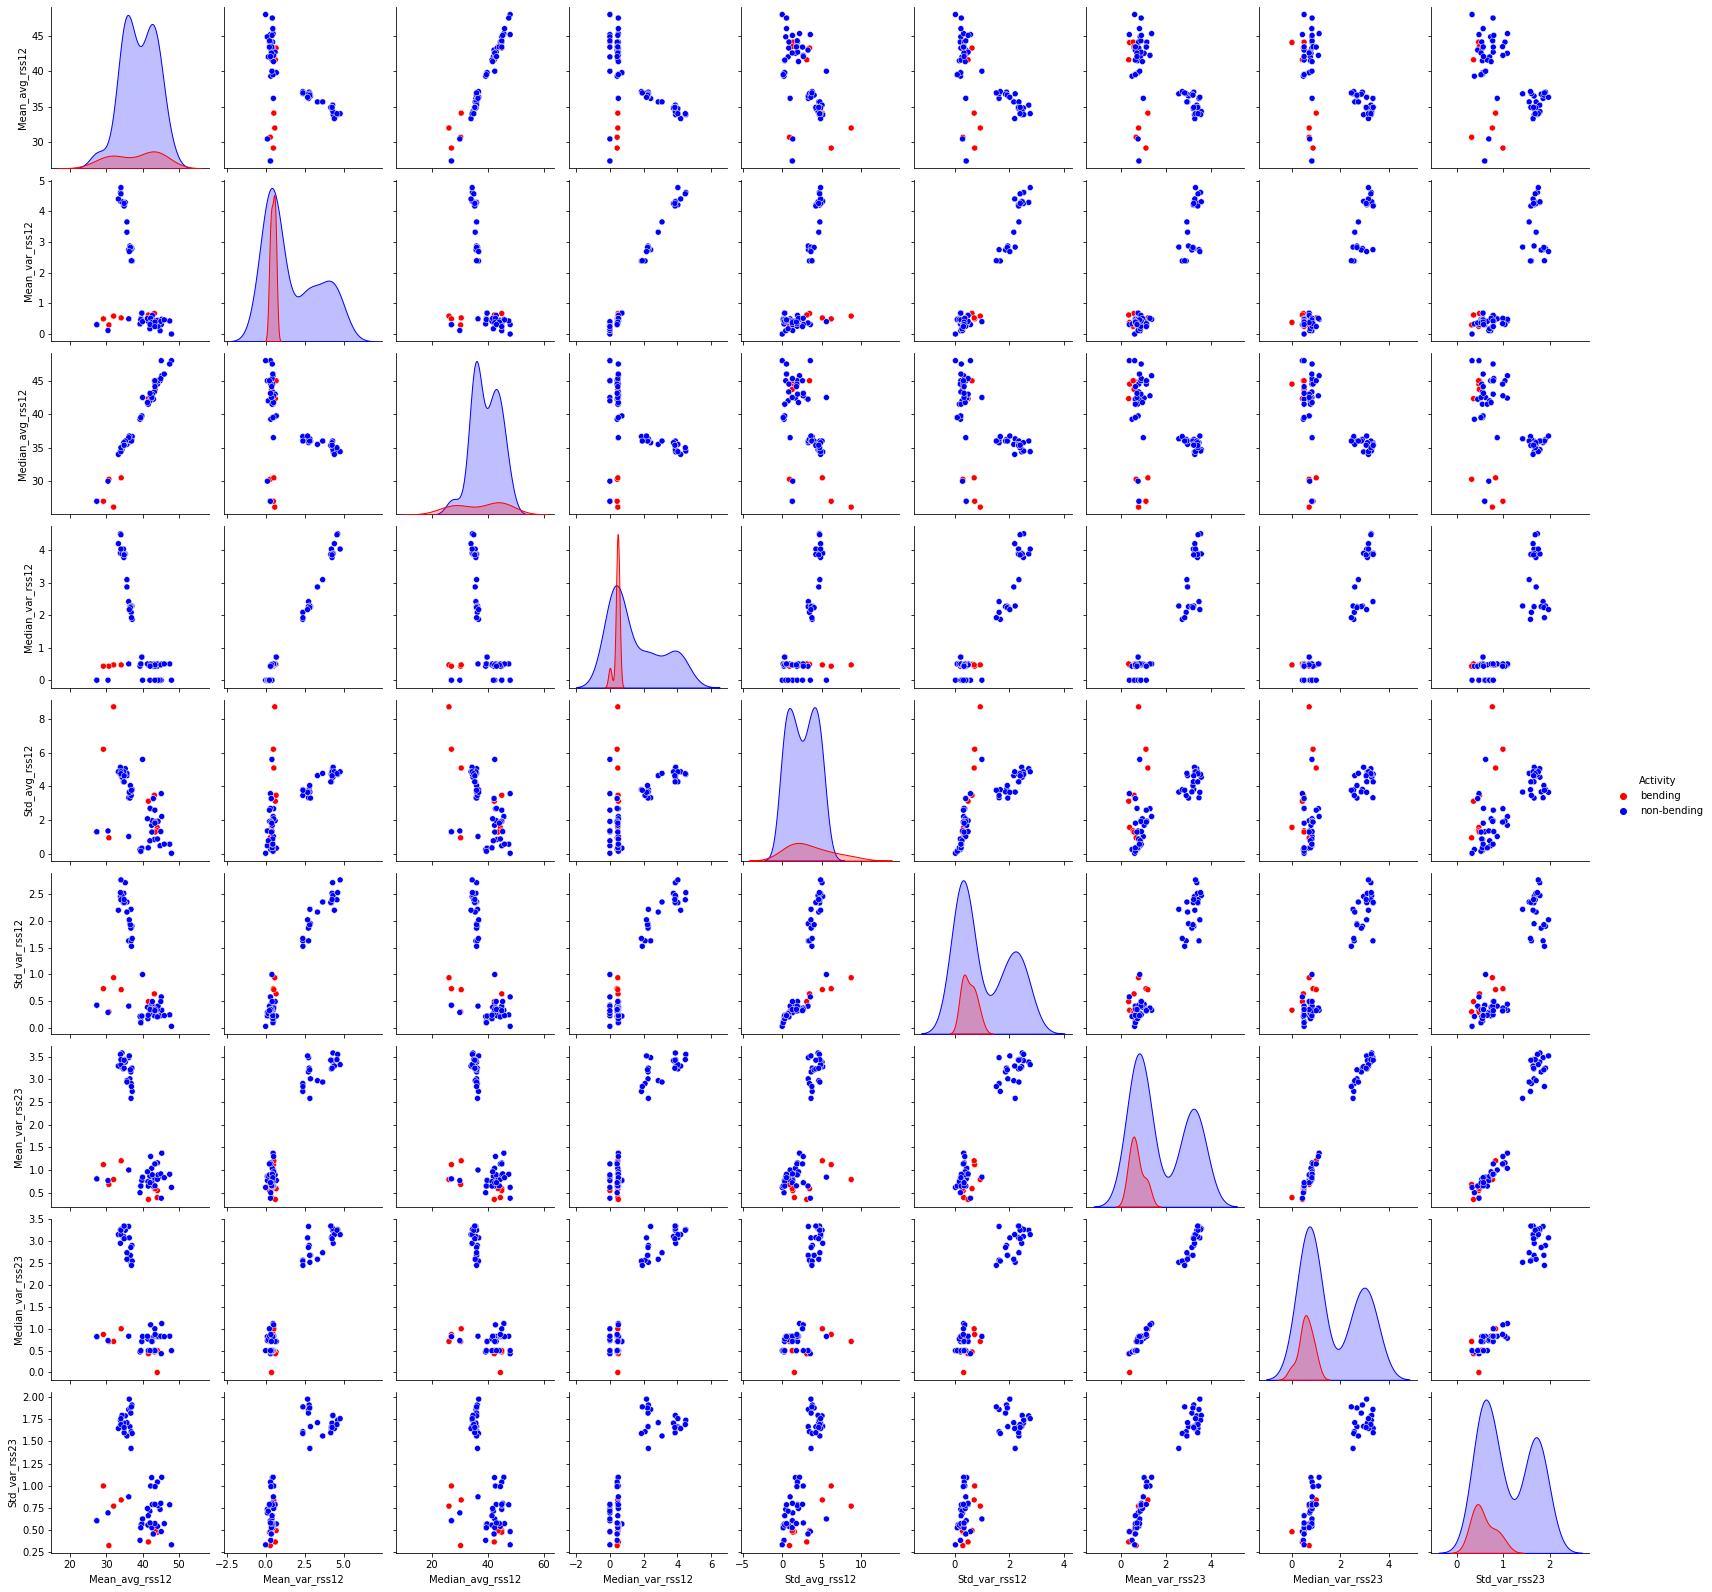

In [13]:
selected_features = ['Mean', 'Median', 'Std']
features_to_take = [1, 2, 12]
features_to_plot = []
Traindata_DF = []

for m,n in train_data_storage.items():
    cnt = 0
    activity = m.split('/')[1]
    splits = np.array_split(n, 2)
    row = []
    for split in splits:
        statistics = split.describe()
        stats = {}
        stats['Mean'] = statistics[1:2].values[0].tolist()
        stats['Std'] = statistics[2:3].values[0].tolist()
        stats['Median'] = statistics[5:6].values[0].tolist()
        stats['Min'] = statistics[3:4].values[0].tolist()
        stats['Max'] = statistics[7:8].values[0].tolist()
        stats['FirstQuartile'] = statistics[4:5].values[0].tolist()
        stats['ThirdQuartile'] = statistics[6:7].values[0].tolist()
        stats_set= stats
        for feature in selected_features:
            data_feature_stat = stats_set[feature]
            for i in range(0, 6):
                if (i+cnt+1) in features_to_take:
                    if len(features_to_plot)<len(selected_features)*len(features_to_take):
                        features_to_plot.append(feature + '_' + sensor_columns[i])
                    row.append(data_feature_stat[i])    
        cnt += 6
        
    if activity=='bending1' or activity=='bending2':
        row.append('bending')
    else:
        row.append('non-bending')
    Traindata_DF.append(row)

features_to_plot.append('Activity')
Traindata_DF = pd.DataFrame(Traindata_DF, columns=features_to_plot)

sbn.pairplot(data=Traindata_DF, hue='Activity', palette={'bending':'red','non-bending':'blue'})

There is not much significant difference between the two but after dividing each time series into two equal-length segments, the scatterplots for both bending and non-bending classes exhibit increased separability and enhanced visual clarity

iii. Break each time series in your training set into ( l \in { 1, 2, \dots, 20 } ) time series of approximately equal length. This results in a logistic regression problem with time-domain features for binary classification. Note that breaking the time series does not alter the number of instances, but it increases the number of features per instance. Follow these steps:

For each ( l ), calculate the p-values for your logistic regression model's parameters.
Refit the logistic regression model after feature pruning, using either p-value elimination or backward selection through sklearn.feature_selection or glm in R.
Use 5-fold cross-validation to determine the optimal pair ( (l, p) ), where ( p ) represents the number of features selected through Recursive Feature Elimination (RFE).
Ensure that you apply cross-validation correctly, and utilize stratified cross-validation if you face class imbalance issues to prevent folds without rare class instances.
Here is an example of Recursive Feature Elimination (RFE) in Python using logistic regression:



Recursive Feature Elimination (RFE)
from sklearn import datasets from sklearn.feature_selection import RFE from sklearn.linear_model import LogisticRegression

Load the iris dataset
dataset = datasets.load_iris()

Create a logistic regression model as the base classifier
model = LogisticRegression()

Create the RFE model to select 3 attributes
rfe = RFE(model, 3) rfe = rfe.fit(dataset.data, dataset.target)

Summarize the selection of attributes
print(rfe.support_) print(rfe.ranking_)

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import sys
from beautifultable import BeautifulTable

selected_features = ['Mean', 'Median', 'Std']
features_to_take = [1, 2, 3, 4, 5, 6]

LRtable_data = []
bestFeaturesL = {}
trainDataL = {}
for L in range(1, 21):
    features_to_plot = []
    Traindata_DF = []

    for m,n in train_data_storage.items():
        activity = m.split('/')[1]
        splits = np.array_split(n, L)
        row = []
        splitNum = 1
        for split in splits:
            statistics = split.describe()
            stats = {}
            stats['Mean'] = statistics[1:2].values[0].tolist()
            stats['Std'] = statistics[2:3].values[0].tolist()
            stats['Median'] = statistics[5:6].values[0].tolist()
            stats['Min'] = statistics[3:4].values[0].tolist()
            stats['Max'] = statistics[7:8].values[0].tolist()
            stats['FirstQuartile'] = statistics[4:5].values[0].tolist()
            stats['ThirdQuartile'] = statistics[6:7].values[0].tolist()
            stats_set= stats
            for feature in selected_features:
                data_feature_stat = stats_set[feature]
                for i in range(0, 6):
                    if len(features_to_plot)<len(selected_features)*len(features_to_take)*L:
                        features_to_plot.append(feature + '_Split' + str(splitNum) + '_' + sensor_columns[i])
                    row.append(data_feature_stat[i])  
                    
            splitNum += 1

        if activity=='bending1' or activity=='bending2':
            row.append(1)
        else:
            row.append(0)
        Traindata_DF.append(row)

    features_to_plot.append('Activity')
    Traindata_DF = pd.DataFrame(Traindata_DF, columns=features_to_plot)

    accuracy = []
    areaUnderCurve = []
    foldFeatures = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for trainindex, valindex in stratifiedKFolds.split(Traindata_DF[features_to_plot], Traindata_DF['Activity']):
        # Get training data
        train_XY = []
        for index in trainindex:
            train_XY.append(Traindata_DF[features_to_plot].iloc[index])    
        train_XY = pd.DataFrame(train_XY)
        train_Y = train_XY['Activity']
        train_X = train_XY.drop('Activity', axis=1)
        
        # Get cross-validation data
        val_XY = []
        for index in valindex:
            val_XY.append(Traindata_DF[features_to_plot].iloc[index])    
        val_XY = pd.DataFrame(val_XY)
        valY = val_XY['Activity']
        valX = val_XY.drop('Activity', axis=1)
        
        # Select best predictors
        logRegModel1 = LogisticRegression(solver='liblinear', C=sys.maxsize)
        rfecvModel = RFECV(estimator=logRegModel1, cv=StratifiedKFold(5))
        rfecvModel.fit(train_X, train_Y)
        ranking = rfecvModel.ranking_
        bestFeatures = []
        for i in range(0, len(ranking)):
            if ranking[i]==1:
                bestFeatures.append(features_to_plot[i])
        
        new_train_X = train_X.loc[:,bestFeatures]
        newValX = valX.loc[:,bestFeatures]
        
        # Retrain logistic regression with best predictors
        logRegModel2 = LogisticRegression(solver='liblinear', C=sys.maxsize)
        logRegModel2 = logRegModel2.fit(new_train_X, train_Y)
        
        # Find accuracy on cross-validation data
        validationAccuracy = logRegModel2.score(newValX, valY)
        validationpredicted_yProb = logRegModel2.predict_proba(newValX)[::,1]
        validationAUC = roc_auc_score(valY, validationpredicted_yProb)

        accuracy.append(validationAccuracy)
        areaUnderCurve.append(validationAUC)
        foldFeatures.append(bestFeatures)

    row = []
    row.append(L)
    row.append(np.mean(accuracy))
    row.append(np.mean(areaUnderCurve))
    kFoldindex = np.argmax(areaUnderCurve)
    bestFeaturesL[L] = foldFeatures[kFoldindex]
    trainDataL[L] = Traindata_DF
    
    LRtable_data.append(row)
    LRtable_data.append(row)
    

tableHeaders = ['L', 'Accuracy', 'Area Under Curve']
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(LRtable_data)):
    table.append_row(LRtable_data[i])
print(table)


+====+==========+==================+
| L  | Accuracy | Area Under Curve |
+====+==========+==================+
| 1  |  0.942   |      0.983       |
+----+----------+------------------+
| 1  |  0.942   |      0.983       |
+----+----------+------------------+
| 2  |  0.899   |      0.975       |
+----+----------+------------------+
| 2  |  0.899   |      0.975       |
+----+----------+------------------+
| 3  |  0.929   |      0.983       |
+----+----------+------------------+
| 3  |  0.929   |      0.983       |
+----+----------+------------------+
| 4  |   0.9    |      0.975       |
+----+----------+------------------+
| 4  |   0.9    |      0.975       |
+----+----------+------------------+
| 5  |  0.943   |       0.95       |
+----+----------+------------------+
| 5  |  0.943   |       0.95       |
+----+----------+------------------+
| 6  |   0.9    |      0.917       |
+----+----------+------------------+
| 6  |   0.9    |      0.917       |
+----+----------+------------------+
|

In [15]:
maxLRAUC = LRtable_data[0][2]
LRBestL = 1
for i in range(1, len(LRtable_data)):
    if LRtable_data[i][2]>maxLRAUC:
        maxLRAUC = LRtable_data[i][2]
        LRBestL = LRtable_data[i][0]

bestselected_features = bestFeaturesL[LRBestL]
print('------------------------------------------------------------------')
print('BEST L based on AUC:', LRBestL)
print('------------------------------------------------------------------')

print('BEST FEATURES:')
table_data = []
for i in range(0, len(bestselected_features)):
    row = []
    row.append(bestselected_features[i])
    table_data.append(row)

tableHeaders = ['Feature Name']
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(table_data)):
    table.append_row(table_data[i])
print(table)

------------------------------------------------------------------
BEST L based on AUC: 9
------------------------------------------------------------------
BEST FEATURES:
+=========================+
|      Feature Name       |
+=========================+
|  Mean_Split3_avg_rss23  |
+-------------------------+
| Median_Split7_avg_rss12 |
+-------------------------+


In [16]:
from sklearn.feature_selection import chi2

new_train_X = trainDataL[LRBestL][bestselected_features]
new_train_Y = trainDataL[LRBestL]['Activity']

# Refit Logistic Regression on best (L, P) pair
logRegModel = LogisticRegression(solver='liblinear', C=sys.maxsize)
logRegModel = logRegModel.fit(new_train_X, new_train_Y)

# coefficients
coefficients = logRegModel.coef_[0]

# p-values
_, pValues = chi2(new_train_X, new_train_Y)

for i in range(0, len(pValues)):
    pValues[i] = round(pValues[i], 3)
    coefficients[i] = round(coefficients[i], 3)

table_data = []
for i in range(0, len(bestselected_features)):
    row = []
    row.append(bestselected_features[i])
    row.append(coefficients[i])
    row.append(pValues[i])
    table_data.append(row)
    
tableHeaders = ['Feature Name', 'Coefficient', 'p-value']
print('COEFFICIENT & P-VALUE FOR BEST FEATURES:')
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(table_data)):
    table.append_row(table_data[i])
print(table)

COEFFICIENT & P-VALUE FOR BEST FEATURES:
+=========================+=============+=========+
|      Feature Name       | Coefficient | p-value |
+=========================+=============+=========+
|  Mean_Split3_avg_rss23  |    17.23    |   0.0   |
+-------------------------+-------------+---------+
| Median_Split7_avg_rss12 |   -8.012    |  0.205  |
+-------------------------+-------------+---------+


Explanation: The goal of cross-validation is to estimate the error on test data. It is crucial that we avoid hiding information from our algorithm by leaving out specific predictors in the process. Thus, using Recursive Feature Elimination (RFE) in combination with cross-validation is the proper method. RFE prior to cross-validation, on the other hand, is a flawed methodology.

iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression ( \beta_i )'s as well as the p-values associated with them.

CONFUSION MATRIX FOR TRAINING DATA:
+====================+===================+=======================+
|    Feature Name    |    Coefficient    |        p-value        |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |         9         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         0         |          60           |
+--------------------+-------------------+-----------------------+
------------------------------------------------------------------
ACCURACY FOR TRAINING DATA:
1.0
------------------------------------------------------------------
AREA UNDER CURVE FOR TRAINING DATA:
1.0
------------------------------------------------------------------
ROC FOR TRAINING DATA:


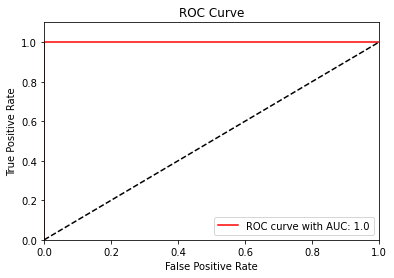

+========+==================+===========================+
| Best L | Testing Accuracy | Cross-Validation Accuracy |
+========+==================+===========================+
|   9    |      0.895       |           0.943           |
+--------+------------------+---------------------------+


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predictions on training data
predicted_y = logRegModel.predict(new_train_X)


# Confusion Matrix
print('CONFUSION MATRIX FOR TRAINING DATA:')
LRTrueNegative, LRFalsePositive, LRFalseNegative, LRTruePositive = confusion_matrix(new_train_Y, predicted_y).ravel()
table_data = []
row1 = []
row1.append('')
row1.append('Predicted Bending')
row1.append('Predicted Non-Bending')
table_data.append(row1)
    
row2 = []
row2.append('Actual Bending')
row2.append(LRTruePositive)
row2.append(LRFalseNegative)
table_data.append(row2)
    
row3 = []
row3.append('Actual Non-Bending')
row3.append(LRFalsePositive)
row3.append(LRTrueNegative)
table_data.append(row3)

table= BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(table_data)):
    table.append_row(table_data[i])
print(table)



print('------------------------------------------------------------------')
    

# Accuracy on training data
LRTrainAccuracy = logRegModel.score(new_train_X, new_train_Y)
LRTrainAccuracy = round(LRTrainAccuracy, 3)
print('ACCURACY FOR TRAINING DATA:')
print(LRTrainAccuracy)
print('------------------------------------------------------------------')


# AUC value on training data
predicted_yProb = logRegModel.predict_proba(new_train_X)[::,1]
LRfpr, LRtpr, _ = roc_curve(new_train_Y,  predicted_yProb)
LRTrainAUC = roc_auc_score(new_train_Y, predicted_yProb)
LRTrainAUC = round(LRTrainAUC, 3)
print('AREA UNDER CURVE FOR TRAINING DATA:')
print(LRTrainAUC)
print('------------------------------------------------------------------')


# ROC curve
print('ROC FOR TRAINING DATA:')
plt.plot(LRfpr, LRtpr, color='red', label='ROC curve with AUC: ' + str(LRTrainAUC))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()
selected_features = ['Mean', 'Median', 'Std']
features_to_take = [1, 2, 3, 4, 5, 6]
features_to_plot = []
LRTestdata_DF = []
for m,n in test_data_storage.items():
    activity = m.split('/')[1]
    splits = np.array_split(n, LRBestL)
    row = []
    splitNum = 1
    for split in splits:
        statistics = split.describe()
        stats = {}
        stats['Mean'] = statistics[1:2].values[0].tolist()
        stats['Std'] = statistics[2:3].values[0].tolist()
        stats['Median'] = statistics[5:6].values[0].tolist()
        stats['Min'] = statistics[3:4].values[0].tolist()
        stats['Max'] = statistics[7:8].values[0].tolist()
        stats['FirstQuartile'] = statistics[4:5].values[0].tolist()
        stats['ThirdQuartile'] = statistics[6:7].values[0].tolist()
        stats_set = stats
        for feature in selected_features:
            data_feature_stat = stats_set[feature]
            for i in range(0, 6):
                if len(features_to_plot)<len(selected_features)*len(features_to_take)*LRBestL:
                    features_to_plot.append(feature + '_Split' + str(splitNum) + '_' + sensor_columns[i])
                row.append(data_feature_stat[i])  

        splitNum += 1

    if activity=='bending1' or activity=='bending2':
        row.append(1)
    else:
        row.append(0)
    LRTestdata_DF.append(row)

features_to_plot.append('Activity')
LRTestdata_DF = pd.DataFrame(LRTestdata_DF, columns=features_to_plot)
LRTestDataX = LRTestdata_DF[bestselected_features]
LRTestDataY = LRTestdata_DF['Activity']

# Accuracy on test data
LRTestAccuracy = logRegModel.score(LRTestDataX, LRTestDataY)
LRTestAccuracy = round(LRTestAccuracy, 3)

# Cross-validation Accuracy
LRValidationAccuracy = 0
for i in range(0, len(LRtable_data)):
    if LRtable_data[i][0]==LRBestL:
        LRValidationAccuracy = round(LRtable_data[i][1], 3)
        break

table_data = []
row = []
row.append(LRBestL)
row.append(LRTestAccuracy)
row.append(LRValidationAccuracy)
table_data.append(row)
tableHeaders = ['Best L', 'Testing Accuracy', 'Cross-Validation Accuracy']   
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(table_data)):
    table.append_row(table_data[i])
print(table)

v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

CONFUSION MATRIX FOR TESTING DATA:
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |         4         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         2         |          13           |
+--------------------+-------------------+-----------------------+
AREA UNDER CURVE FOR TESTING DATA:
1.0
------------------------------------------------------------------
ROC FOR TESTING DATA:


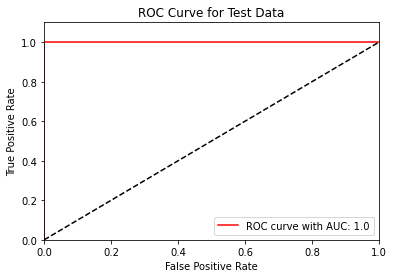

In [18]:
# Predictions on testing data
test_predictions = logRegModel.predict(LRTestDataX)  # Changed from predicted_y

# Confusion Matrix for testing data
print('CONFUSION MATRIX FOR TESTING DATA:')
tn_test, fp_test, fn_test, tp_test = confusion_matrix(LRTestDataY, test_predictions).ravel()  # Changed variable names

# Prepare confusion matrix table data for test data
test_conf_matrix_data = []  # Changed from table_data
test_conf_matrix_row1 = ['', 'Predicted Bending', 'Predicted Non-Bending']
test_conf_matrix_data.append(test_conf_matrix_row1)

test_conf_matrix_row2 = ['Actual Bending', tp_test, fn_test]  # Changed variable names
test_conf_matrix_data.append(test_conf_matrix_row2)

test_conf_matrix_row3 = ['Actual Non-Bending', fp_test, tn_test]  # Changed variable names
test_conf_matrix_data.append(test_conf_matrix_row3)

# Set up confusion matrix table for test data
test_conf_matrix_table = BeautifulTable(max_width=100)  # Changed from table
test_conf_matrix_table.set_style(BeautifulTable.STYLE_SEPARATED)
test_conf_matrix_headers = ['', 'Predicted Bending', 'Predicted Non-Bending']  # Changed headers
test_conf_matrix_table.column_headers = test_conf_matrix_headers

for row in test_conf_matrix_data:
    test_conf_matrix_table.append_row(row)

print(test_conf_matrix_table)

# AUC value on testing data
test_pred_prob = logRegModel.predict_proba(LRTestDataX)[:, 1]  # Changed from predicted_yProb
fpr_test, tpr_test, _ = roc_curve(LRTestDataY, test_pred_prob)  # Changed from LRfpr, LRtpr
test_auc = round(roc_auc_score(LRTestDataY, test_pred_prob), 3)  # Changed from LRTestAUC
print('AREA UNDER CURVE FOR TESTING DATA:')
print(test_auc)
print('------------------------------------------------------------------')

# ROC curve for testing data
print('ROC FOR TESTING DATA:')
plt.plot(fpr_test, tpr_test, color='red', label='ROC curve with AUC: ' + str(test_auc))  # Changed from LRfpr, LRtpr, LRTestAUC
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()


vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters

Because of the poor separation between the bending and non-bending classes, some folds may not obtain any samples from the minority class when standard K-fold Cross Validation is used. Biased training and inconsistent model performance could result from this, particularly for the minority class. This problem is solved by using stratified K-fold cross validation, which guarantees that the bending and non-bending classes are proportionately represented in each fold. By maintaining the class distribution throughout all folds, this technique improves the accuracy and balance of model training.

Furthermore, while estimating the logistic regression parameters, stratified K-fold cross validation lessens instability. If some folds do not have minority class samples, the model parameters may differ substantially when there is class imbalance.By using stratification, the parameter estimates become more stable and reflective of the overall class distribution, improving the model's reliability and generalization.

vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the mode?

The bending classes are designated as 1 and the non-bending classes as 0, depending on the assignment. The two exhibit a notable class disparity, as seen by the confusion matrices. The proper course of action in light of this imbalance is to use case-controlled sampling to construct a regression model. In order to balance the dataset, the minority class is oversampled (bent).

More examples from the bending class will be added through oversampling, either by creating synthetic samples (such through SMOTE) or by replicating already-existing cases. In order to improve the model's performance and lessen bias toward the majority (non-bending) class, it is imperative that the regression model get a balanced dataset. By using this method, the model is better equipped to learn the traits of both groups, producing predictions that are more accurate and trustworthy.

In [19]:
!pip install -U imbalanced-learn

In [20]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import _safe_indexing  # Ensure compatibility

# Load the training data and extract relevant features and labels
balanced_train_X = trainDataL[LRBestL][bestselected_features]  # Changed from new_train_X
balanced_train_Y = trainDataL[LRBestL]['Activity']  # Changed from new_train_Y

# Initialize counters for bending and non-bending observations
non_bending_observations = 0
bending_observations = 0

# Loop through training labels and count occurrences of each class
for i in range(len(balanced_train_Y)):
    if balanced_train_Y[i] == 0:
        non_bending_observations += 1
    else:
        bending_observations += 1

# Print out the class distribution before oversampling
print('------------------------------------------------------------------')
print('Before Over-sampling, number of bending observations:', bending_observations)
print('Before Over-sampling, number of non-bending observations:', non_bending_observations)
print('------------------------------------------------------------------')

# Apply SMOTE for oversampling the minority class
from imblearn.over_sampling import SMOTE  # Ensure this import is present in your code
smote = SMOTE(sampling_strategy='all')  # Changed from sm
oversampled_train_X, oversampled_train_Y = smote.fit_resample(balanced_train_X, balanced_train_Y.ravel())  # Changed from sampledtrain_X, sampledtrain_Y

# Initialize counters for the oversampled data
oversampled_non_bending_count = 0
oversampled_bending_count = 0

# Loop through the oversampled labels and count occurrences of each class
for i in range(len(oversampled_train_Y)):
    if oversampled_train_Y[i] == 0:
        oversampled_non_bending_count += 1
    else:
        oversampled_bending_count += 1

# Print out the class distribution after oversampling
print('------------------------------------------------------------------')
print('After Over-sampling, number of bending observations:', oversampled_bending_count)
print('After Over-sampling, number of non-bending observations:', oversampled_non_bending_count)
print('------------------------------------------------------------------')


------------------------------------------------------------------
Before Over-sampling, number of bending observations: 9
Before Over-sampling, number of non-bending observations: 60
------------------------------------------------------------------
------------------------------------------------------------------
After Over-sampling, number of bending observations: 60
After Over-sampling, number of non-bending observations: 60
------------------------------------------------------------------


------------------------------------------------------------------
ACCURACY FOR TRAINING DATA:
1.0
------------------------------------------------------------------
CONFUSION MATRIX FOR TRAINING DATA:
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |        60         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         0         |          60           |
+--------------------+-------------------+-----------------------+
------------------------------------------------------------------
AREA UNDER CURVE FOR TRAINING DATA:
1.0
------------------------------------------------------------------
ROC FOR TRAINING DATA

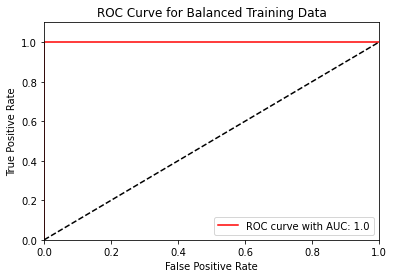

In [21]:
# Train a logistic regression model on the oversampled data
balanced_log_reg_model = LogisticRegression(solver='liblinear', C=sys.maxsize)  # Changed from logRegBalancedModel
balanced_log_reg_model.fit(oversampled_train_X, oversampled_train_Y)  # Changed from sampledtrain_X, sampledtrain_Y

# Accuracy on training data
train_accuracy_balanced = balanced_log_reg_model.score(oversampled_train_X, oversampled_train_Y)  # Changed variable name
train_accuracy_balanced = round(train_accuracy_balanced, 3)
print('------------------------------------------------------------------')
print('ACCURACY FOR TRAINING DATA:')
print(train_accuracy_balanced)
print('------------------------------------------------------------------')

# Predictions on the training data
train_predictions_balanced = balanced_log_reg_model.predict(oversampled_train_X)  # Changed from predictedtrain_Y

# Confusion Matrix for training data
print('CONFUSION MATRIX FOR TRAINING DATA:')
tn, fp, fn, tp = confusion_matrix(oversampled_train_Y, train_predictions_balanced).ravel()  # Updated variable names

confusion_matrix_table = []  # Changed from table_data
conf_matrix_row1 = ['', 'Predicted Bending', 'Predicted Non-Bending']
confusion_matrix_table.append(conf_matrix_row1)

conf_matrix_row2 = ['Actual Bending', tp, fn]  # Changed from LRTruePositive, LRFalseNegative
confusion_matrix_table.append(conf_matrix_row2)

conf_matrix_row3 = ['Actual Non-Bending', fp, tn]  # Changed from LRFalsePositive, LRTrueNegative
confusion_matrix_table.append(conf_matrix_row3)

# Display confusion matrix in table format
conf_table = BeautifulTable(max_width=100)
conf_table.set_style(BeautifulTable.STYLE_SEPARATED)
conf_table.column_headers = [' ', 'Predicted Bending', 'Predicted Non-Bending']

for row in confusion_matrix_table:
    conf_table.append_row(row)

print(conf_table)
print('------------------------------------------------------------------')

# Predicted probabilities on the training data for ROC and AUC
train_pred_prob_balanced = balanced_log_reg_model.predict_proba(oversampled_train_X)[:, 1]  # Changed from predictedtrain_YProb
fpr_balanced, tpr_balanced, _ = roc_curve(oversampled_train_Y, train_pred_prob_balanced)  # Updated variable names
train_auc_balanced = round(roc_auc_score(oversampled_train_Y, train_pred_prob_balanced), 3)  # Changed from LRBalancedTrainAUC

# AUC value
print('AREA UNDER CURVE FOR TRAINING DATA:')
print(train_auc_balanced)
print('------------------------------------------------------------------')

# ROC curve for training data
print('ROC FOR TRAINING DATA:')
plt.plot(fpr_balanced, tpr_balanced, color='red', label='ROC curve with AUC: ' + str(train_auc_balanced))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Balanced Training Data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()


------------------------------------------------------------------
ACCURACY FOR TESTING DATA:
0.895
------------------------------------------------------------------
CONFUSION MATRIX FOR TESTING DATA:
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |         4         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         2         |          13           |
+--------------------+-------------------+-----------------------+
------------------------------------------------------------------
AREA UNDER CURVE FOR TESTING DATA:
1.0
------------------------------------------------------------------
ROC FOR TESTING DATA:


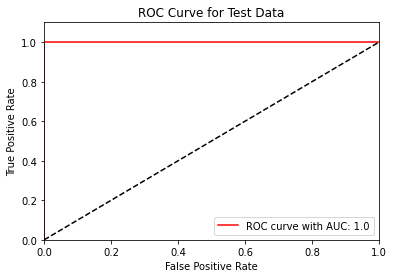

In [24]:

# Calculate accuracy on the test data
test_accuracy_balanced = balanced_log_reg_model.score(LRTestDataX, LRTestDataY)  # Changed from LRBalancedTestAccuracy
test_accuracy_balanced = round(test_accuracy_balanced, 3)
print('------------------------------------------------------------------')
print('ACCURACY FOR TESTING DATA:')
print(test_accuracy_balanced)
print('------------------------------------------------------------------')

# Predictions on the test data
test_predictions_balanced = balanced_log_reg_model.predict(LRTestDataX)  # Changed from predicted_y

# Confusion Matrix for the test data
print('CONFUSION MATRIX FOR TESTING DATA:')
tn_test, fp_test, fn_test, tp_test = confusion_matrix(LRTestDataY, test_predictions_balanced).ravel()  # Changed from trueNegative, falsePositive, etc.

conf_matrix_test_data = []  # Changed from table_data
conf_test_row1 = ['', 'Predicted Bending', 'Predicted Non-Bending']
conf_matrix_test_data.append(conf_test_row1)

conf_test_row2 = ['Actual Bending', tp_test, fn_test]  # Changed from LRTruePositive, LRFalseNegative
conf_matrix_test_data.append(conf_test_row2)

conf_test_row3 = ['Actual Non-Bending', fp_test, tn_test]  # Changed from LRFalsePositive, LRTrueNegative
conf_matrix_test_data.append(conf_test_row3)

# Display the confusion matrix for test data
conf_matrix_test_table = BeautifulTable(max_width=100)  # Changed from table
conf_matrix_test_table.set_style(BeautifulTable.STYLE_SEPARATED)
conf_matrix_test_table.column_headers = ['', 'Predicted Bending', 'Predicted Non-Bending']  # Ensure this is populated

for row in conf_matrix_test_data:
    conf_matrix_test_table.append_row(row)

print(conf_matrix_test_table)
print('------------------------------------------------------------------')

# Predicted probabilities on the test data for ROC and AUC
test_pred_prob_balanced = balanced_log_reg_model.predict_proba(LRTestDataX)[:, 1]  # Changed from predicted_yProb
fpr_test_balanced, tpr_test_balanced, _ = roc_curve(LRTestDataY, test_pred_prob_balanced)  # Changed from fpr, tpr
test_auc_balanced = round(roc_auc_score(LRTestDataY, test_pred_prob_balanced), 3)  # Changed from LRBalancedAUC

# AUC value for the test data
print('AREA UNDER CURVE FOR TESTING DATA:')
print(test_auc_balanced)
print('------------------------------------------------------------------')

# ROC curve for the test data
print('ROC FOR TESTING DATA:')
plt.plot(fpr_test_balanced, tpr_test_balanced, color='red', label='ROC curve with AUC: ' + str(test_auc_balanced))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()


# (b) Binary Classification Using L1-Penalized Logistic Regression

i.Repeat 2(a)iii using L1-penalized logistic regression, i.e., instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [25]:
from sklearn.preprocessing import MinMaxScaler  # Already added
from sklearn.linear_model import LogisticRegressionCV  # Add this import
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from beautifultable import BeautifulTable

selected_stats = ['Mean', 'Median', 'Std']
stats_to_extract = [1, 2, 3, 4, 5, 6]

L1_penalized_results = []
L1_traindata_store = {}
lambda_l1_values = {}
for split_num in range(1, 21):
    features_for_plot = []
    L1_train_data = []

    for filepath, data_frame in train_data_storage.items():
        activity_type = filepath.split('/')[1]
        split_data = np.array_split(data_frame, split_num)
        row_values = []
        split_counter = 1
        for split_df in split_data:
            summary_stats = split_df.describe()
            stat_dict = {}
            stat_dict['Mean'] = summary_stats[1:2].values[0].tolist()
            stat_dict['Std'] = summary_stats[2:3].values[0].tolist()
            stat_dict['Median'] = summary_stats[5:6].values[0].tolist()
            stat_dict['Min'] = summary_stats[3:4].values[0].tolist()
            stat_dict['Max'] = summary_stats[7:8].values[0].tolist()
            stat_dict['FirstQuartile'] = summary_stats[4:5].values[0].tolist()
            stat_dict['ThirdQuartile'] = summary_stats[6:7].values[0].tolist()
            stat_set = stat_dict
            for feature in selected_stats:
                feature_stat = stat_set[feature]
                for i in range(6):
                    if len(features_for_plot) < len(selected_stats) * len(stats_to_extract) * split_num:
                        features_for_plot.append(feature + '_Split' + str(split_counter) + '_' + sensor_columns[i])
                    row_values.append(feature_stat[i])

            split_counter += 1

        if activity_type == 'bending1' or activity_type == 'bending2':
            row_values.append(1)
        else:
            row_values.append(0)
        L1_train_data.append(row_values)

    features_for_plot.append('Activity')
    L1_train_data = pd.DataFrame(L1_train_data, columns=features_for_plot)

    # Apply MinMaxScaler for normalization
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(L1_train_data.values)
    L1_train_data = pd.DataFrame(scaled_data, columns=L1_train_data.columns)

    accuracy_results = []
    auc_results = []
    lambda_values = []
    stratified_k_folds = StratifiedKFold(n_splits=5, shuffle=False)

    for train_idx, val_idx in stratified_k_folds.split(L1_train_data[features_for_plot], L1_train_data['Activity']):
        train_xy = []
        for idx in train_idx:
            train_xy.append(L1_train_data[features_for_plot].iloc[idx])
        train_xy = pd.DataFrame(train_xy)
        train_Y = train_xy['Activity']
        train_X = train_xy.drop('Activity', axis=1)

        val_xy = []
        for idx in val_idx:
            val_xy.append(L1_train_data[features_for_plot].iloc[idx])
        val_xy = pd.DataFrame(val_xy)
        val_Y = val_xy['Activity']
        val_X = val_xy.drop('Activity', axis=1)

        # Restrict the range of C using logspace
        L1_model = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000, Cs=np.logspace(-4, 4, 10))
        L1_model = L1_model.fit(train_X, train_Y)
        penalty_value = L1_model.C_[0]
        lambda_val = max(round(float(1 / penalty_value), 3), 0.001)  # Ensure lambda does not become zero

        # Log selected C values for debugging
        print(f"Selected C values for fold (split_num={split_num}):", L1_model.C_)

        validation_accuracy = L1_model.score(val_X, val_Y)
        predicted_prob = L1_model.predict_proba(val_X)[:, 1]
        fpr, tpr, _ = roc_curve(val_Y, predicted_prob)
        validation_auc = roc_auc_score(val_Y, predicted_prob)

        accuracy_results.append(validation_accuracy)
        auc_results.append(validation_auc)
        lambda_values.append(lambda_val)

    row_result = []
    row_result.append(split_num)
    row_result.append(np.mean(accuracy_results))
    row_result.append(np.mean(auc_results))
    best_fold_index = np.argmax(auc_results)
    lambda_l1_values[split_num] = lambda_values[best_fold_index]
    trainDataL[split_num] = L1_train_data

    L1_penalized_results.append(row_result)
    L1_traindata_store[split_num] = L1_train_data

# Print the results table
table_headers = ['L', 'Accuracy', 'AUC']
result_table = BeautifulTable(max_width=100)
result_table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(table_headers) != 0:
    result_table.column_headers = table_headers
for i in range(len(L1_penalized_results)):
    result_table.append_row(L1_penalized_results[i])

print(result_table)

# Find the best split and lambda based on AUC
max_auc_value = L1_penalized_results[0][2]
optimal_split_num = L1_penalized_results[0][0]
chosen_lambda = L1_penalized_results[0][1]

for index in range(len(L1_penalized_results)):
    if L1_penalized_results[index][2] > max_auc_value:
        max_auc_value = L1_penalized_results[index][2]
        optimal_split_num = L1_penalized_results[index][0]

chosen_lambda = lambda_l1_values[optimal_split_num]

print('------------------------------------------------------------------')
print('Optimal Split Count based on AUC:', optimal_split_num)
print('------------------------------------------------------------------')

print('Chosen Lambda:', chosen_lambda)
print('------------------------------------------------------------------')


Selected C values for fold (split_num=1): [2.7825594]
Selected C values for fold (split_num=1): [2.7825594]
Selected C values for fold (split_num=1): [166.81005372]
Selected C values for fold (split_num=1): [2.7825594]
Selected C values for fold (split_num=1): [2.7825594]
Selected C values for fold (split_num=2): [21.5443469]
Selected C values for fold (split_num=2): [21.5443469]
Selected C values for fold (split_num=2): [2.7825594]
Selected C values for fold (split_num=2): [21.5443469]
Selected C values for fold (split_num=2): [21.5443469]
Selected C values for fold (split_num=3): [166.81005372]
Selected C values for fold (split_num=3): [166.81005372]
Selected C values for fold (split_num=3): [21.5443469]
Selected C values for fold (split_num=3): [2.7825594]
Selected C values for fold (split_num=3): [2.7825594]
Selected C values for fold (split_num=4): [10000.]
Selected C values for fold (split_num=4): [1291.54966501]
Selected C values for fold (split_num=4): [21.5443469]
Selected C v

------------------------------------------------------------------
Training Data Accuracy:
1.0
------------------------------------------------------------------
Confusion Matrix for Training Data:
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |         9         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         0         |          60           |
+--------------------+-------------------+-----------------------+
------------------------------------------------------------------
Area Under Curve for Training Data:
1.0
------------------------------------------------------------------
ROC for Training Data:


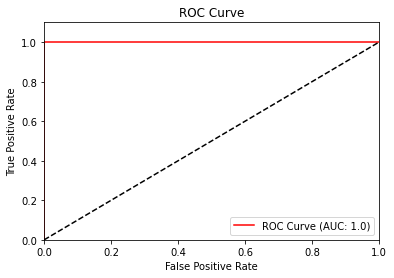

In [26]:
train_data_df = L1_traindata_store[optimal_split_num]
train_target_y = pd.DataFrame(train_data_df['Activity'])
train_features_x = train_data_df.drop('Activity', axis=1)

train_target_y = np.array(train_target_y).flatten()

optimal_C_value = round(float(1 / chosen_lambda), 3)
l1_logistic_model = LogisticRegression(solver='liblinear', penalty='l1', C=optimal_C_value)
l1_logistic_model = l1_logistic_model.fit(train_features_x, train_target_y)

l1_train_accuracy = l1_logistic_model.score(train_features_x, train_target_y)
l1_train_accuracy = round(l1_train_accuracy, 3)
print('------------------------------------------------------------------')
print('Training Data Accuracy:')
print(l1_train_accuracy)
print('------------------------------------------------------------------')

# Predictions on training data
train_pred_y = l1_logistic_model.predict(train_features_x)

# Confusion Matrix
print('Confusion Matrix for Training Data:')
true_neg, false_pos, false_neg, true_pos = confusion_matrix(train_target_y, train_pred_y).ravel()
confusion_matrix_data = []
header_row = ['', 'Predicted Bending', 'Predicted Non-Bending']
confusion_matrix_data.append(header_row)
    
actual_bending_row = ['Actual Bending', true_pos, false_neg]
confusion_matrix_data.append(actual_bending_row)
    
actual_non_bending_row = ['Actual Non-Bending', false_pos, true_neg]
confusion_matrix_data.append(actual_non_bending_row)
    
confusion_table = BeautifulTable(max_width=100)
confusion_table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(header_row) != 0:
    confusion_table.column_headers = header_row
for row in confusion_matrix_data:
    confusion_table.append_row(row)
print(confusion_table)

print('------------------------------------------------------------------')
    
train_pred_prob = l1_logistic_model.predict_proba(train_features_x)[:, 1]
fpr_vals, tpr_vals, _ = roc_curve(train_target_y, train_pred_prob)
train_auc_score = round(roc_auc_score(train_target_y, train_pred_prob), 3)

# AUC Value
print('Area Under Curve for Training Data:')
print(train_auc_score)
print('------------------------------------------------------------------')

# ROC Curve
print('ROC for Training Data:')
plt.plot(fpr_vals, tpr_vals, color='red', label='ROC Curve (AUC: ' + str(train_auc_score) + ')')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

------------------------------------------------------------------
Accuracy for Testing Data:
1.0
------------------------------------------------------------------
Confusion Matrix for Testing Data:
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+====================+===================+=======================+
|                    | Predicted Bending | Predicted Non-Bending |
+--------------------+-------------------+-----------------------+
|   Actual Bending   |         4         |           0           |
+--------------------+-------------------+-----------------------+
| Actual Non-Bending |         0         |          15           |
+--------------------+-------------------+-----------------------+
------------------------------------------------------------------
Area Under Curve for Testing Data:
1.0
------------------------------------------------------------------
ROC for Testing Data:


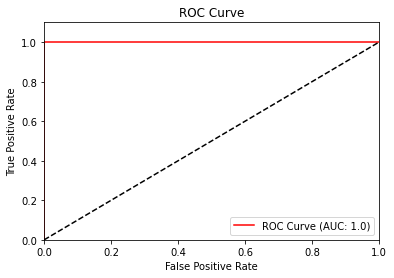

In [31]:
important_stats = ['Mean', 'Median', 'Std']
selected_indices = [1, 2, 3, 4, 5, 6]
stats_for_plot = []
test_data_df = []

for file_path, data_frame in test_data_storage.items():
    activity_label = file_path.split('/')[1]
    split_frames = np.array_split(data_frame, optimal_split_num)
    row_data = []
    split_counter = 1

    for split_frame in split_frames:
        summary_stats = split_frame.describe()
        stat_values = {
            'Mean': summary_stats[1:2].values[0].tolist(),
            'Std': summary_stats[2:3].values[0].tolist(),
            'Median': summary_stats[5:6].values[0].tolist(),
            'Min': summary_stats[3:4].values[0].tolist(),
            'Max': summary_stats[7:8].values[0].tolist(),
            'FirstQuartile': summary_stats[4:5].values[0].tolist(),
            'ThirdQuartile': summary_stats[6:7].values[0].tolist()
        }

        for stat_feature in important_stats:
            feature_stat = stat_values[stat_feature]
            for i in range(6):
                if len(stats_for_plot) < len(important_stats) * len(selected_indices) * optimal_split_num:
                    stats_for_plot.append(stat_feature + '_Split' + str(split_counter) + '_' + sensor_columns[i])
                row_data.append(feature_stat[i])

        split_counter += 1

    if activity_label == 'bending1' or activity_label == 'bending2':
        row_data.append(1)
    else:
        row_data.append(0)
    
    test_data_df.append(row_data)

stats_for_plot.append('Activity')
test_data_df = pd.DataFrame(test_data_df, columns=stats_for_plot)

# Normalize the test data
scaler = MinMaxScaler()
scaled_test_data = scaler.fit_transform(test_data_df.values)
test_data_df = pd.DataFrame(scaled_test_data, columns=test_data_df.columns)

test_target_Y = pd.DataFrame(test_data_df['Activity'])
test_features_X = test_data_df.drop('Activity', axis=1)

test_accuracy_l1 = l1_logistic_model.score(test_features_X, test_target_Y)
test_accuracy_l1 = round(test_accuracy_l1, 3)
print('------------------------------------------------------------------')
print('Accuracy for Testing Data:')
print(test_accuracy_l1)
print('------------------------------------------------------------------')

# Predictions on testing data
test_predictions = l1_logistic_model.predict(test_features_X)

# Confusion Matrix
print('Confusion Matrix for Testing Data:')
tn, fp, fn, tp = confusion_matrix(test_target_Y, test_predictions).ravel()
confusion_matrix_results = []
header_row = ['', 'Predicted Bending', 'Predicted Non-Bending']
confusion_matrix_results.append(header_row)
    
actual_bending_row = ['Actual Bending', tp, fn]
confusion_matrix_results.append(actual_bending_row)
    
actual_non_bending_row = ['Actual Non-Bending', fp, tn]
confusion_matrix_results.append(actual_non_bending_row)
    
conf_matrix_table = BeautifulTable(max_width=100)
conf_matrix_table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(header_row) != 0:
    conf_matrix_table.column_headers = header_row
for row in confusion_matrix_results:
    conf_matrix_table.append_row(row)
print(conf_matrix_table)
print('------------------------------------------------------------------')
    
test_pred_prob = l1_logistic_model.predict_proba(test_features_X)[:, 1]
fpr_vals, tpr_vals, _ = roc_curve(test_target_Y, test_pred_prob)
test_auc_score = roc_auc_score(test_target_Y, test_pred_prob)
test_auc_score = round(test_auc_score, 3)

# AUC Value
print('Area Under Curve for Testing Data:')
print(test_auc_score)
print('------------------------------------------------------------------')

# ROC Curve
print('ROC for Testing Data:')
plt.plot(fpr_vals, tpr_vals, color='red', label='ROC Curve (AUC: ' + str(test_auc_score) + ')')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

In [44]:
table_data = []
row1 = []
row1.append('Training Accuracy')
row1.append(LRTrainAccuracy)
row1.append(l1_train_accuracy)
table_data.append(row1)

row2 = []
row2.append('Training AUC')
row2.append(LRTrainAUC)
row2.append(train_auc_score)
table_data.append(row2)

row3 = []
row3.append('Testing Accuracy')
row3.append(LRTestAccuracy)
row3.append(test_auc_score)
table_data.append(row3)

row4 = []
row4.append('Testing AUC')
row4.append(test_auc)
row4.append(test_auc_score)
table_data.append(row4)

tableHeaders = ['Parameter', 'Logistic Regression', 'L1-Penalised Logistic Regression']
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(tableHeaders)!=0:
    table.column_headers = tableHeaders
for i in range(0, len(table_data)):
    table.append_row(table_data[i])
print(table)

+===================+=====================+==================================+
|     Parameter     | Logistic Regression | L1-Penalised Logistic Regression |
+===================+=====================+==================================+
| Training Accuracy |         1.0         |               1.0                |
+-------------------+---------------------+----------------------------------+
|   Training AUC    |         1.0         |               1.0                |
+-------------------+---------------------+----------------------------------+
| Testing Accuracy  |        0.895        |               1.0                |
+-------------------+---------------------+----------------------------------+
|    Testing AUC    |         1.0         |               1.0                |
+-------------------+---------------------+----------------------------------+


The L-1 penalised Logistic Regression model is easier to implement because we just have to add one regularization parameter. The testing accuracy for L1-penalised Logistic Regression model is much better than Logistic Regression with variable selection. Hence, L1-penalised Logistic Regression model performs better for this dataset.

# (c) Multi-class Classification (The Realistic Case)

i.Find the best _l_ in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from beautifultable import BeautifulTable

# Add the activity labels
activity_labels = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

# Feature statistics
stats_selected = ['Mean', 'Median', 'Std']
features_extract = [1, 2, 3, 4, 5, 6]

# Results storage
multi_l1_results = []
multi_l1_train_store = {}
l1_penalty_dict = {}

# Loop over L splits
for split_num in range(1, 21):
    feature_columns = []
    multi_l1_train_df = []

    print(f"\nProcessing Split Number: {split_num}")

    # Iterate through data directories
    for file_name, df in train_data_storage.items():
        activity_type = file_name.split('/')[1]
        df_splits = np.array_split(df, split_num)
        row_data = []
        split_counter = 1
        
        # Process each split of the dataframe
        for split_df in df_splits:
            stats_summary = split_df.describe()
            stat_dict = {
                'Mean': stats_summary[1:2].values[0].tolist(),
                'Std': stats_summary[2:3].values[0].tolist(),
                'Median': stats_summary[5:6].values[0].tolist(),
                'Min': stats_summary[3:4].values[0].tolist(),
                'Max': stats_summary[7:8].values[0].tolist(),
                'FirstQuartile': stats_summary[4:5].values[0].tolist(),
                'ThirdQuartile': stats_summary[6:7].values[0].tolist()
            }

            # Append feature statistics for the split
            for stat_name in stats_selected:
                stat_values = stat_dict[stat_name]
                for i in range(6):
                    if len(feature_columns) < len(stats_selected) * len(features_extract) * split_num:
                        feature_columns.append(stat_name + '_Split' + str(split_counter) + '_' + sensor_columns[i])  # Use 'Part'
                    row_data.append(stat_values[i])

            split_counter += 1

        # Assign labels to the row based on activity type
        activity_idx = activity_labels.index(activity_type)
        row_data.append(activity_idx)
        multi_l1_train_df.append(row_data)
        
    # Prepare the dataframe for training
    feature_columns.append('Activity')
    multi_l1_train_df = pd.DataFrame(multi_l1_train_df, columns=feature_columns)
    
    # Print the feature columns
    print("\nFeature Columns for Current Split:")
    print(feature_columns)

    # Print dataframe shape
    print(f"\nShape of Training Data for Split {split_num}: {multi_l1_train_df.shape}")
   
    # Apply normalization
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(multi_l1_train_df[feature_columns[:-1]].values)
    normalized_df = pd.DataFrame(normalized_values, columns=feature_columns[:-1])
    multi_l1_train_df = normalized_df.join(multi_l1_train_df['Activity'])

    # Print a sample of the normalized data
    print(f"\nSample of Normalized Data for Split {split_num}:")
    print(multi_l1_train_df.head())

    # Initialize accuracy and penalties lists
    cv_accuracy = []
    penalties_list = []
    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    # Cross-validation loop
    for train_idx, val_idx in kfold.split(multi_l1_train_df[feature_columns], multi_l1_train_df['Activity']):
        train_df = pd.DataFrame([multi_l1_train_df.iloc[i] for i in train_idx])
        val_df = pd.DataFrame([multi_l1_train_df.iloc[i] for i in val_idx])
        
        X_train, y_train = train_df.drop('Activity', axis=1), train_df['Activity']
        X_val, y_val = val_df.drop('Activity', axis=1), val_df['Activity']
        
        # Logistic Regression with L1 penalty
        l1_logistic_model = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000, multi_class='auto')
        l1_logistic_model.fit(X_train, y_train)
        
        # Record penalties and validation accuracy
        penalty_values = l1_logistic_model.C_
        val_accuracy = l1_logistic_model.score(X_val, y_val)
        
        cv_accuracy.append(val_accuracy)
        penalties_list.append(penalty_values)

        # Print penalty values and validation accuracy for this fold
        print(f"\nPenalty Values for Split {split_num}: {penalty_values}")
        print(f"Validation Accuracy for Current Fold: {val_accuracy}")
        
    # Record best penalties and accuracy for the current split_num
    best_fold_idx = np.argmax(cv_accuracy)
    l1_penalty_dict[split_num] = penalties_list[best_fold_idx]
    multi_l1_results.append([split_num, np.mean(cv_accuracy)])
    multi_l1_train_store[split_num] = multi_l1_train_df
    
    # Print the best penalty for this split
    print(f"\nBest Penalty for Split {split_num}: {penalties_list[best_fold_idx]}")
    
# Display the results in a table format
headers = ['Split Count', 'Accuracy']
results_table = BeautifulTable(max_width=100)
results_table.set_style(BeautifulTable.STYLE_SEPARATED)
if headers:
    results_table.column_headers = headers

for result in multi_l1_results:
    results_table.append_row(result)

# Print final result table
print("\nFinal Cross-Validation Results:")
print(results_table)

# Print the stored penalty values for each split
print("\nPenalty Values for Each Split:")
for split_num, penalties in l1_penalty_dict.items():
    print(f"Split {split_num}: {penalties}")



Processing Split Number: 1

Feature Columns for Current Split:
['Mean_Split1_avg_rss12', 'Mean_Split1_var_rss12', 'Mean_Split1_avg_rss13', 'Mean_Split1_var_rss13', 'Mean_Split1_avg_rss23', 'Mean_Split1_var_rss23', 'Median_Split1_avg_rss12', 'Median_Split1_var_rss12', 'Median_Split1_avg_rss13', 'Median_Split1_var_rss13', 'Median_Split1_avg_rss23', 'Median_Split1_var_rss23', 'Std_Split1_avg_rss12', 'Std_Split1_var_rss12', 'Std_Split1_avg_rss13', 'Std_Split1_var_rss13', 'Std_Split1_avg_rss23', 'Std_Split1_var_rss23', 'Activity']

Shape of Training Data for Split 1: (69, 19)

Sample of Normalized Data for Split 1:
   Mean_Split1_avg_rss12  Mean_Split1_var_rss12  Mean_Split1_avg_rss13  \
0               0.800389               0.091715               0.996558   
1               0.712913               0.150758               1.000000   
2               0.688182               0.115729               0.821528   
3               0.775766               0.081174               0.641023   
4          


Penalty Values for Split 2: [ 166.81005372   21.5443469  1291.54966501   21.5443469    21.5443469
   21.5443469     2.7825594 ]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 2: [  21.5443469   166.81005372   21.5443469    21.5443469  1291.54966501
   21.5443469     2.7825594 ]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 2: [2.15443469e+01 1.00000000e-04 2.78255940e+00 2.15443469e+01
 2.15443469e+01 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.9285714285714286

Penalty Values for Split 2: [2.78255940e+00 1.00000000e-04 2.78255940e+00 1.29154967e+03
 2.15443469e+01 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 2: [  2.7825594   21.5443469    2.7825594  166.81005372   2.7825594
 166.81005372   2.7825594 ]
Validation Accuracy for Current Fold: 0.7692307692307693

Best Penalty for Split 2: [2.15443469e+01 1.00000000e-04 2.


Penalty Values for Split 4: [2.78255940e+00 1.00000000e-04 1.66810054e+02 2.15443469e+01
 2.15443469e+01 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 4: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.15443469e+01
 1.29154967e+03 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 4: [2.78255940e+00 1.00000000e-04 2.15443469e+01 2.15443469e+01
 1.66810054e+02 2.78255940e+00 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 4: [2.15443469e+01 1.00000000e-04 2.78255940e+00 2.78255940e+00
 1.66810054e+02 2.78255940e+00 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 4: [2.78255940e+00 1.00000000e-04 2.15443469e+01 2.15443469e+01
 1.00000000e+04 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6923076923076923

Best Penalty for Split 4: [2.


Penalty Values for Split 6: [21.5443469 21.5443469 21.5443469  2.7825594 21.5443469  2.7825594
  2.7825594]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 6: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.15443469e+01
 2.78255940e+00 1.29154967e+03 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 6: [2.15443469e+01 1.00000000e-04 1.00000000e+04 2.15443469e+01
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 6: [2.78255940e+00 1.00000000e-04 2.15443469e+01 2.15443469e+01
 1.00000000e-04 1.66810054e+02 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 6: [2.15443469e+01 1.00000000e-04 1.00000000e+04 2.15443469e+01
 1.29154967e+03 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5384615384615384

Best Penalty for Split 6: [2.15443469e+01 1.00000000e-04 


Penalty Values for Split 7: [2.78255940e+00 1.00000000e-04 1.00000000e+04 2.78255940e+00
 2.78255940e+00 1.29154967e+03 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 7: [2.15443469e+01 1.00000000e-04 2.15443469e+01 1.00000000e+04
 2.15443469e+01 2.78255940e+00 2.15443469e+01]

Processing Split Number: 8

Feature Columns for Current Split:
['Mean_Split1_avg_rss12', 'Mean_Split1_var_rss12', 'Mean_Split1_avg_rss13', 'Mean_Split1_var_rss13', 'Mean_Split1_avg_rss23', 'Mean_Split1_var_rss23', 'Median_Split1_avg_rss12', 'Median_Split1_var_rss12', 'Median_Split1_avg_rss13', 'Median_Split1_var_rss13', 'Median_Split1_avg_rss23', 'Median_Split1_var_rss23', 'Std_Split1_avg_rss12', 'Std_Split1_var_rss12', 'Std_Split1_avg_rss13', 'Std_Split1_var_rss13', 'Std_Split1_avg_rss23', 'Std_Split1_var_rss23', 'Mean_Split2_avg_rss12', 'Mean_Split2_var_rss12', 'Mean_Split2_avg_rss13', 'Mean_Split2_var_rss13', 'Mean_Split2_avg_rss23', 'Mean_Split2_var_rss23', 


Feature Columns for Current Split:
['Mean_Split1_avg_rss12', 'Mean_Split1_var_rss12', 'Mean_Split1_avg_rss13', 'Mean_Split1_var_rss13', 'Mean_Split1_avg_rss23', 'Mean_Split1_var_rss23', 'Median_Split1_avg_rss12', 'Median_Split1_var_rss12', 'Median_Split1_avg_rss13', 'Median_Split1_var_rss13', 'Median_Split1_avg_rss23', 'Median_Split1_var_rss23', 'Std_Split1_avg_rss12', 'Std_Split1_var_rss12', 'Std_Split1_avg_rss13', 'Std_Split1_var_rss13', 'Std_Split1_avg_rss23', 'Std_Split1_var_rss23', 'Mean_Split2_avg_rss12', 'Mean_Split2_var_rss12', 'Mean_Split2_avg_rss13', 'Mean_Split2_var_rss13', 'Mean_Split2_avg_rss23', 'Mean_Split2_var_rss23', 'Median_Split2_avg_rss12', 'Median_Split2_var_rss12', 'Median_Split2_avg_rss13', 'Median_Split2_var_rss13', 'Median_Split2_avg_rss23', 'Median_Split2_var_rss23', 'Std_Split2_avg_rss12', 'Std_Split2_var_rss12', 'Std_Split2_avg_rss13', 'Std_Split2_var_rss13', 'Std_Split2_avg_rss23', 'Std_Split2_var_rss23', 'Mean_Split3_avg_rss12', 'Mean_Split3_var_rss12', '


Feature Columns for Current Split:
['Mean_Split1_avg_rss12', 'Mean_Split1_var_rss12', 'Mean_Split1_avg_rss13', 'Mean_Split1_var_rss13', 'Mean_Split1_avg_rss23', 'Mean_Split1_var_rss23', 'Median_Split1_avg_rss12', 'Median_Split1_var_rss12', 'Median_Split1_avg_rss13', 'Median_Split1_var_rss13', 'Median_Split1_avg_rss23', 'Median_Split1_var_rss23', 'Std_Split1_avg_rss12', 'Std_Split1_var_rss12', 'Std_Split1_avg_rss13', 'Std_Split1_var_rss13', 'Std_Split1_avg_rss23', 'Std_Split1_var_rss23', 'Mean_Split2_avg_rss12', 'Mean_Split2_var_rss12', 'Mean_Split2_avg_rss13', 'Mean_Split2_var_rss13', 'Mean_Split2_avg_rss23', 'Mean_Split2_var_rss23', 'Median_Split2_avg_rss12', 'Median_Split2_var_rss12', 'Median_Split2_avg_rss13', 'Median_Split2_var_rss13', 'Median_Split2_avg_rss23', 'Median_Split2_var_rss23', 'Std_Split2_avg_rss12', 'Std_Split2_var_rss12', 'Std_Split2_avg_rss13', 'Std_Split2_var_rss13', 'Std_Split2_avg_rss23', 'Std_Split2_var_rss23', 'Mean_Split3_avg_rss12', 'Mean_Split3_var_rss12', '


Penalty Values for Split 10: [2.15443469e+01 1.00000000e-04 2.78255940e+00 2.78255940e+00
 2.15443469e+01 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 10: [2.15443469e+01 1.00000000e-04 1.00000000e+04 1.29154967e+03
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 10: [2.78255940e+00 1.00000000e+04 2.15443469e+01 1.29154967e+03
 2.15443469e+01 1.00000000e+04 2.78255940e+00]

Processing Split Number: 11

Feature Columns for Current Split:
['Mean_Split1_avg_rss12', 'Mean_Split1_var_rss12', 'Mean_Split1_avg_rss13', 'Mean_Split1_var_rss13', 'Mean_Split1_avg_rss23', 'Mean_Split1_var_rss23', 'Median_Split1_avg_rss12', 'Median_Split1_var_rss12', 'Median_Split1_avg_rss13', 'Median_Split1_var_rss13', 'Median_Split1_avg_rss23', 'Median_Split1_var_rss23', 'Std_Split1_avg_rss12', 'Std_Split1_var_rss12', 'Std_Split1_avg_rss13', 'Std_Split1_var_rss13', 'Std_Split1_avg


Penalty Values for Split 11: [2.78255940e+00 1.00000000e+04 2.15443469e+01 2.78255940e+00
 2.15443469e+01 2.78255940e+00 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 11: [1.00000000e+04 1.00000000e-04 2.15443469e+01 1.00000000e+04
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 11: [2.78255940e+00 1.00000000e-04 1.66810054e+02 1.66810054e+02
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 11: [2.15443469e+01 1.00000000e-04 2.78255940e+00 2.78255940e+00
 1.29154967e+03 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 11: [1.00000000e+04 1.00000000e-04 2.15443469e+01 1.66810054e+02
 1.00000000e-04 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5384615384615384

Best Penalty for Split 11: [2.78255940e+00 1.00000000e


Penalty Values for Split 12: [1.66810054e+02 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.15443469e+01 2.78255940e+00 2.15443469e+01]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 12: [1.66810054e+02 1.00000000e-04 1.29154967e+03 1.00000000e+04
 2.78255940e+00 1.00000000e-04 1.66810054e+02]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 12: [2.15443469e+01 2.15443469e+01 2.15443469e+01 2.15443469e+01
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 12: [2.15443469e+01 1.00000000e-04 1.29154967e+03 2.78255940e+00
 2.78255940e+00 1.00000000e+04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.42857142857142855

Penalty Values for Split 12: [1.00000000e+04 1.00000000e-04 2.78255940e+00 2.15443469e+01
 2.15443469e+01 2.78255940e+00 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6923076923076923

Best Penalty for Split 


Penalty Values for Split 13: [2.78255940e+00 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.15443469e+01 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 13: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.78255940e+00
 2.15443469e+01 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6428571428571429

Penalty Values for Split 13: [2.15443469e+01 1.00000000e-04 1.00000000e+04 1.00000000e+04
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 13: [1.66810054e+02 1.00000000e-04 1.00000000e+04 2.78255940e+00
 2.15443469e+01 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 13: [2.15443469e+01 1.00000000e-04 1.00000000e+04 2.78255940e+00
 2.15443469e+01 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5384615384615384

Best Penalty for Split 1


Penalty Values for Split 14: [1.66810054e+02 1.00000000e-04 2.15443469e+01 2.78255940e+00
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.42857142857142855

Penalty Values for Split 14: [1.00000000e+04 1.00000000e-04 1.66810054e+02 1.00000000e+04
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 14: [2.15443469e+01 1.00000000e-04 2.15443469e+01 1.66810054e+02
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 14: [2.15443469e+01 1.00000000e-04 1.29154967e+03 2.78255940e+00
 2.78255940e+00 2.78255940e+00 2.15443469e+01]
Validation Accuracy for Current Fold: 0.35714285714285715

Penalty Values for Split 14: [1.29154967e+03 1.00000000e-04 1.00000000e+04 2.15443469e+01
 2.15443469e+01 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7692307692307693

Best Penalty for Split 14: [1.2915496


Penalty Values for Split 15: [2.78255940e+00 1.00000000e-04 1.66810054e+02 2.15443469e+01
 1.29154967e+03 2.78255940e+00 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 15: [2.78255940e+00 1.00000000e-04 1.66810054e+02 1.00000000e+04
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 15: [2.78255940e+00 1.00000000e-04 2.15443469e+01 1.29154967e+03
 1.00000000e-04 1.00000000e+04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 15: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.78255940e+00
 1.00000000e-04 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 15: [2.15443469e+01 1.00000000e-04 2.15443469e+01 1.66810054e+02
 2.15443469e+01 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 15: [2.78255940e+00 1.00000000e


Penalty Values for Split 16: [1.66810054e+02 2.15443469e+01 1.29154967e+03 1.66810054e+02
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 16: [2.15443469e+01 1.00000000e-04 1.00000000e+04 2.15443469e+01
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 16: [2.78255940e+00 1.00000000e-04 1.00000000e+04 1.29154967e+03
 1.00000000e-04 1.00000000e+04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 16: [2.15443469e+01 1.00000000e-04 1.29154967e+03 1.66810054e+02
 1.00000000e-04 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 16: [1.66810054e+02 1.00000000e-04 2.15443469e+01 1.66810054e+02
 2.15443469e+01 2.78255940e+00 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 1


Penalty Values for Split 17: [2.15443469e+01 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 17: [2.78255940e+00 1.00000000e-04 2.15443469e+01 2.78255940e+00
 2.15443469e+01 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 17: [1.00000000e+04 1.00000000e-04 1.66810054e+02 1.29154967e+03
 1.00000000e-04 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 17: [1.29154967e+03 1.00000000e-04 1.00000000e+04 2.78255940e+00
 2.78255940e+00 1.29154967e+03 2.78255940e+00]
Validation Accuracy for Current Fold: 0.42857142857142855

Penalty Values for Split 17: [2.78255940e+00 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.78255940e+00 1.00000000e+04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.7692307692307693

Best Penalty for Split 


Penalty Values for Split 18: [1.29154967e+03 1.00000000e-04 2.15443469e+01 1.66810054e+02
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 18: [2.15443469e+01 1.00000000e-04 1.00000000e+04 1.29154967e+03
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 18: [ 1291.54966501    21.5443469     21.5443469    166.81005372
    21.5443469  10000.            21.5443469 ]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 18: [1.66810054e+02 1.00000000e-04 1.00000000e+04 2.78255940e+00
 2.15443469e+01 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 18: [2.78255940e+00 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.78255940e+00 1.00000000e-04 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 18: [ 1291.54966501    21.5443469     21.54434


Penalty Values for Split 19: [1.66810054e+02 2.15443469e+01 1.66810054e+02 1.66810054e+02
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 19: [1.00000000e+04 1.00000000e-04 2.15443469e+01 1.66810054e+02
 2.15443469e+01 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 19: [1.66810054e+02 1.00000000e-04 2.15443469e+01 1.29154967e+03
 2.78255940e+00 1.00000000e+04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.7142857142857143

Penalty Values for Split 19: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.15443469e+01
 2.78255940e+00 1.00000000e-04 2.15443469e+01]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 19: [2.15443469e+01 1.00000000e-04 1.00000000e+04 1.66810054e+02
 2.78255940e+00 2.15443469e+01 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6153846153846154

Best Penalty for Split 1


Penalty Values for Split 20: [2.15443469e+01 2.15443469e+01 1.29154967e+03 1.29154967e+03
 2.78255940e+00 1.00000000e-04 1.66810054e+02]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 20: [2.15443469e+01 1.00000000e-04 1.66810054e+02 2.15443469e+01
 1.66810054e+02 1.00000000e-04 1.66810054e+02]
Validation Accuracy for Current Fold: 0.5

Penalty Values for Split 20: [1.29154967e+03 1.00000000e-04 1.66810054e+02 1.29154967e+03
 2.78255940e+00 1.00000000e+04 1.66810054e+02]
Validation Accuracy for Current Fold: 0.7857142857142857

Penalty Values for Split 20: [2.15443469e+01 1.00000000e-04 2.15443469e+01 2.15443469e+01
 2.78255940e+00 1.00000000e-04 1.66810054e+02]
Validation Accuracy for Current Fold: 0.5714285714285714

Penalty Values for Split 20: [1.00000000e+04 1.00000000e-04 1.00000000e+04 1.29154967e+03
 2.15443469e+01 1.29154967e+03 2.78255940e+00]
Validation Accuracy for Current Fold: 0.6923076923076923

Best Penalty for Split 20: [2.15443469e

In [46]:
# Initialize the maximum accuracy and the best split count (L)
max_cv_accuracy = multi_l1_results[0][1]
max_cv_accuracy = round(max_cv_accuracy, 3)
best_split_count = multi_l1_results[0][0]

# Loop to find the best accuracy and corresponding split number
for idx in range(len(multi_l1_results)):
    if multi_l1_results[idx][1] > max_cv_accuracy:
        max_cv_accuracy = round(multi_l1_results[idx][1], 3)
        best_split_count = multi_l1_results[idx][0]
        
# Extract the best L1 penalties for the best split count
optimal_l1_penalties = l1_penalty_dict[best_split_count]

# Print the best results
print('------------------------------------------------------------------')
print('Best Split (L) for Multiclass Logistic Regression:', best_split_count)
print('------------------------------------------------------------------')
print('Optimal Lambda for Each Class on Multiclass Logistic Regression:')
lambda_data = []

# Prepare the data for the table
for idx in range(len(optimal_l1_penalties)):
    penalty_row = []
    penalty_row.append(activity_labels[idx])  # Add class name
    penalty_row.append(round(float(1 / optimal_l1_penalties[idx]), 3))  # Calculate Lambda
    lambda_data.append(penalty_row)

# Create and print the table
lambda_headers = ['Class Name', 'Lambda']
lambda_table = BeautifulTable(max_width=100)
lambda_table.set_style(BeautifulTable.STYLE_SEPARATED)
if lambda_headers:
    lambda_table.column_headers = lambda_headers

for penalty_row in lambda_data:
    lambda_table.append_row(penalty_row)

print(lambda_table)
print('------------------------------------------------------------------------------')
print('Best Cross-Validation Accuracy on Multiclass Logistic Regression:', max_cv_accuracy)
print('------------------------------------------------------------------------------')


------------------------------------------------------------------
Best Split (L) for Multiclass Logistic Regression: 1
------------------------------------------------------------------
Optimal Lambda for Each Class on Multiclass Logistic Regression:
+============+========+
| Class Name | Lambda |
+============+========+
|  bending1  | 0.046  |
+------------+--------+
|  bending2  | 0.001  |
+------------+--------+
|  cycling   | 0.359  |
+------------+--------+
|   lying    | 0.001  |
+------------+--------+
|  sitting   | 0.046  |
+------------+--------+
|  standing  | 0.046  |
+------------+--------+
|  walking   | 0.359  |
+------------+--------+
------------------------------------------------------------------------------
Best Cross-Validation Accuracy on Multiclass Logistic Regression: 0.797
------------------------------------------------------------------------------


In [47]:
def multiclass_prediction(model_list, input_features):
    predicted_classes = []
    prediction_probabilities_df = pd.DataFrame()

    # Loop through each class model and get prediction probabilities
    for idx in range(len(model_list)):
        current_model = model_list[idx]
        class_probabilities = current_model.predict_proba(input_features)
        class_probability_column = []
        
        # Extract probabilities for each instance and round them
        for i in range(len(class_probabilities)):
            class_probability_column.append(round(class_probabilities[i][1], 3))
        
        class_probability_column = pd.DataFrame(class_probability_column, columns=[activity_labels[idx]])
        prediction_probabilities_df = pd.concat([prediction_probabilities_df, class_probability_column], axis=1)

    # Determine the class with the highest probability for each instance
    for i in range(len(prediction_probabilities_df)):
        max_probability = 0.0
        predicted_class_label = ''
        
        # Loop through each activity label and compare the probabilities
        for idx in range(len(activity_labels)):
            probability = prediction_probabilities_df[activity_labels[idx]].iloc[i]
            if probability > max_probability:
                max_probability = probability
                predicted_class_label = activity_labels[idx]
        
        predicted_classes.append(activity_labels.index(predicted_class_label))

    return predicted_classes, prediction_probabilities_df


In [48]:
# Use correct previously outputted variable names
multi_l1_train_df = multi_l1_train_store[best_split_count]  # Correcting this line
multi_l1_train_y = pd.DataFrame(multi_l1_train_df['Activity'])
multi_l1_train_x = multi_l1_train_df.drop('Activity', axis=1)

multi_l1_train_y = np.array(multi_l1_train_y).flatten()

multi_class_models = []
for idx in range(len(activity_labels)):
    current_class = activity_labels[idx]
    optimal_C_value = optimal_l1_penalties[idx]  # Using correct penalty variable
    binary_class_labels = []
    
    # Create binary labels for the current class
    for i in range(len(multi_l1_train_y)):
        if multi_l1_train_y[i] == idx:
            binary_class_labels.append(1)
        else:
            binary_class_labels.append(0)

    # Train Logistic Regression model for the current class
    class_model = LogisticRegression(solver='liblinear', 
                                     penalty='l1', 
                                     C=optimal_C_value,
                                     multi_class='auto')
    
    class_model = class_model.fit(multi_l1_train_x, binary_class_labels)
    multi_class_models.append(class_model)

# Predict class labels using the trained models
train_predictions, train_probabilities = multiclass_prediction(multi_class_models, multi_l1_train_x)

# Calculate the accuracy on the training data
correct_predictions = 0
for i in range(len(train_predictions)):
    if train_predictions[i] == multi_l1_train_y[i]:
        correct_predictions += 1

multi_l1_train_accuracy = round(correct_predictions / len(multi_l1_train_y), 3)
print('------------------------------------------------------------------')
print('ACCURACY FOR TESTING DATA ON MULTICLASS LOGISTIC REGRESSION:')
print(multi_l1_train_accuracy)
print('------------------------------------------------------------------')


------------------------------------------------------------------
ACCURACY FOR TESTING DATA ON MULTICLASS LOGISTIC REGRESSION:
0.971
------------------------------------------------------------------


ii. Repeat 2(c)i using a Naïve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB  # Add this import
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from beautifultable import BeautifulTable

selected_stats = ['Mean', 'Median', 'Std']
stats_to_extract = [1, 2, 3, 4, 5, 6]

gaussian_classification_results = []
gaussian_train_data_store = {}

for split_count in range(1, 21):
    features_for_plotting = []
    gaussian_training_df = []

    for filepath, data_frame in train_data_storage.items():
        activity_label = filepath.split('/')[1]
        split_data_frames = np.array_split(data_frame, split_count)
        row_data = []
        split_counter = 1
        
        for split_data in split_data_frames:
            statistics_summary = split_data.describe()
            stats_summary = {}
            stats_summary['Mean'] = statistics_summary[1:2].values[0].tolist()
            stats_summary['Std'] = statistics_summary[2:3].values[0].tolist()
            stats_summary['Median'] = statistics_summary[5:6].values[0].tolist()
            stats_summary['Min'] = statistics_summary[3:4].values[0].tolist()
            stats_summary['Max'] = statistics_summary[7:8].values[0].tolist()
            stats_summary['FirstQuartile'] = statistics_summary[4:5].values[0].tolist()
            stats_summary['ThirdQuartile'] = statistics_summary[6:7].values[0].tolist()
            
            for feature_name in selected_stats:
                feature_values = stats_summary[feature_name]
                for i in range(6):
                    if len(features_for_plotting) < len(selected_stats) * len(stats_to_extract) * split_count:
                        features_for_plotting.append(f'{feature_name}_Split{split_counter}_{sensor_columns[i]}')
                    row_data.append(feature_values[i])

            split_counter += 1

        activity_index = activity_labels.index(activity_label)
        row_data.append(activity_index)
        gaussian_training_df.append(row_data)

    features_for_plotting.append('Activity')
    gaussian_training_df = pd.DataFrame(gaussian_training_df, columns=features_for_plotting)

    k_fold_validation = StratifiedKFold(n_splits=5, shuffle=False)
    validation_accuracies = []
    
    for train_indices, val_indices in k_fold_validation.split(gaussian_training_df[features_for_plotting], gaussian_training_df['Activity']):
        training_data = []
        for idx in train_indices:
            training_data.append(gaussian_training_df[features_for_plotting].iloc[idx])
        training_data = pd.DataFrame(training_data)
        training_y = training_data['Activity']
        training_x = training_data.drop('Activity', axis=1)

        validation_data = []
        for idx in val_indices:
            validation_data.append(gaussian_training_df[features_for_plotting].iloc[idx])
        validation_data = pd.DataFrame(validation_data)
        validation_y = validation_data['Activity']
        validation_x = validation_data.drop('Activity', axis=1)

        # Fit Gaussian Naive Bayes classifier
        gaussian_nb_model = GaussianNB()
        gaussian_nb_model = gaussian_nb_model.fit(training_x, training_y)

        # Calculate cross-validation accuracy
        validation_accuracy = gaussian_nb_model.score(validation_x, validation_y)
        validation_accuracies.append(validation_accuracy)

    row_result = []
    row_result.append(split_count)
    row_result.append(round(np.mean(validation_accuracies), 3))
    gaussian_classification_results.append(row_result)

    gaussian_train_data_store[split_count] = gaussian_training_df

# Display results in table format
table_headers = ['L', 'Accuracy']
result_table = BeautifulTable(max_width=100)
result_table.set_style(BeautifulTable.STYLE_SEPARATED)

if len(table_headers) != 0:
    result_table.column_headers = table_headers
for i in range(len(gaussian_classification_results)):
    result_table.append_row(gaussian_classification_results[i])

print(result_table)

+====+==========+
| L  | Accuracy |
+====+==========+
| 1  |   0.87   |
+----+----------+
| 2  |  0.769   |
+----+----------+
| 3  |  0.725   |
+----+----------+
| 4  |  0.724   |
+----+----------+
| 5  |  0.798   |
+----+----------+
| 6  |  0.725   |
+----+----------+
| 7  |  0.725   |
+----+----------+
| 8  |  0.725   |
+----+----------+
| 9  |  0.741   |
+----+----------+
| 10 |  0.726   |
+----+----------+
| 11 |  0.725   |
+----+----------+
| 12 |  0.755   |
+----+----------+
| 13 |  0.668   |
+----+----------+
| 14 |  0.741   |
+----+----------+
| 15 |  0.769   |
+----+----------+
| 16 |  0.741   |
+----+----------+
| 17 |  0.741   |
+----+----------+
| 18 |  0.741   |
+----+----------+
| 19 |  0.698   |
+----+----------+
| 20 |  0.698   |
+----+----------+


In [51]:
max_gaussian_accuracy = gaussian_classification_results[0][1]
optimal_split_count = gaussian_classification_results[0][0]

for idx in range(len(gaussian_classification_results)):
    if gaussian_classification_results[idx][1] > max_gaussian_accuracy:
        max_gaussian_accuracy = gaussian_classification_results[idx][1]
        optimal_split_count = gaussian_classification_results[idx][0]

print('------------------------------------------------------------------')
print('Optimal Split Count (L):', optimal_split_count)
print('------------------------------------------------------------------')
print('Best Cross-Validation Accuracy:', max_gaussian_accuracy)
print('------------------------------------------------------------------')


------------------------------------------------------------------
Optimal Split Count (L): 1
------------------------------------------------------------------
Best Cross-Validation Accuracy: 0.87
------------------------------------------------------------------


In [52]:
optimal_train_df = gaussian_train_data_store[optimal_split_count]
train_target = pd.DataFrame(optimal_train_df['Activity'])
train_features = optimal_train_df.drop('Activity', axis=1)

train_target = np.array(train_target).flatten()

final_gaussian_nb_model = GaussianNB()
final_gaussian_nb_model = final_gaussian_nb_model.fit(train_features, train_target)

training_accuracy = final_gaussian_nb_model.score(train_features, train_target)
training_accuracy = round(training_accuracy, 3)

print('------------------------------------------------------------------')
print('Training Data Accuracy:')
print(training_accuracy)
print('------------------------------------------------------------------')
print('Training Data Error:')
print(round(1 - training_accuracy, 3))
print('------------------------------------------------------------------')


------------------------------------------------------------------
Training Data Accuracy:
0.957
------------------------------------------------------------------
Training Data Error:
0.043
------------------------------------------------------------------


In [53]:
selected_statistics = ['Mean', 'Median', 'Std']
stats_indices = [1, 2, 3, 4, 5, 6]
plot_features = []
test_data_processed = []

# Use the appropriate split count variable: gauss_bestL
for file, df in test_data_storage.items():
    activity_label = file.split('/')[1]
    split_datasets = np.array_split(df, optimal_split_count)  # Corrected variable name
    row_data = []
    split_counter = 1

    for subset in split_datasets:
        stats_summary = subset.describe()
        summary_dict = {}
        summary_dict['Mean'] = stats_summary[1:2].values[0].tolist()
        summary_dict['Std'] = stats_summary[2:3].values[0].tolist()
        summary_dict['Median'] = stats_summary[5:6].values[0].tolist()
        summary_dict['Min'] = stats_summary[3:4].values[0].tolist()
        summary_dict['Max'] = stats_summary[7:8].values[0].tolist()
        summary_dict['FirstQuartile'] = stats_summary[4:5].values[0].tolist()
        summary_dict['ThirdQuartile'] = stats_summary[6:7].values[0].tolist()
        summary_data = summary_dict

        for stat in selected_statistics:
            stat_values = summary_data[stat]
            for i in range(6):
                if len(plot_features) < len(selected_statistics) * len(stats_indices) * optimal_split_count:
                    plot_features.append(stat + '_Split' + str(split_counter) + '_' + sensor_columns[i])
                row_data.append(stat_values[i])

        split_counter += 1

    activity_index = activity_labels.index(activity_label)
    row_data.append(activity_index)
    test_data_processed.append(row_data)

plot_features.append('Activity')
test_data_processed = pd.DataFrame(test_data_processed, columns=plot_features)

test_labels = pd.DataFrame(test_data_processed['Activity'])
test_features = test_data_processed.drop('Activity', axis=1)

# Ensure the final model is correctly named
test_accuracy = final_gaussian_nb_model.score(test_features, test_labels)
test_accuracy = round(test_accuracy, 3)

print('------------------------------------------------------------------')
print('Testing Data Accuracy:')
print(test_accuracy)
print('------------------------------------------------------------------')
print('Testing Data Error:')
print(round(1 - test_accuracy, 3))
print('------------------------------------------------------------------')


------------------------------------------------------------------
Testing Data Accuracy:
0.842
------------------------------------------------------------------
Testing Data Error:
0.158
------------------------------------------------------------------


In [54]:
def plot_multiclass_roc(model, train_labels, test_features, test_labels):
    label_binarizer = preprocessing.LabelBinarizer()
    label_binarizer.fit(train_labels)
    
    transformed_train_labels = label_binarizer.transform(train_labels)
    transformed_test_labels = label_binarizer.transform(test_labels)

    predicted_probabilities = model.predict_proba(test_features)

    false_positive_rate = {}
    true_positive_rate = {}
    auc_scores = {}
    
    for label_idx in range(len(activity_labels)):
        false_positive_rate[label_idx], true_positive_rate[label_idx], _ = roc_curve(transformed_test_labels[:, label_idx], predicted_probabilities[:, label_idx])
        auc_scores[label_idx] = round(auc(false_positive_rate[label_idx], true_positive_rate[label_idx]), 2)

    for label_idx in range(len(activity_labels)):
        activity_name = activity_labels[label_idx]
        roc_label = f'ROC for {activity_name} (AUC: {auc_scores[label_idx]})'
        plt.plot(false_positive_rate[label_idx], true_positive_rate[label_idx], label=roc_label)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend()
    
    return plt, auc_scores


In [55]:
from sklearn import preprocessing  # Import preprocessing tools
from sklearn.metrics import roc_curve, auc 

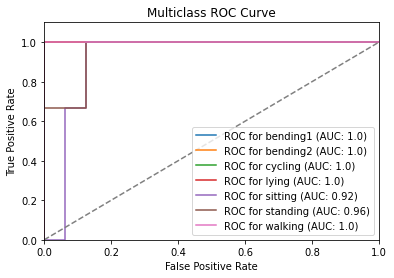

In [56]:
gaussian_roc_plot, gaussian_roc_auc = plot_multiclass_roc(final_gaussian_nb_model, train_target, test_features, test_labels)
gaussian_roc_plot.show()

In [57]:
# Predictions on the test data
gaussian_predictions = final_gaussian_nb_model.predict(test_features)
gaussian_test_labels = np.array(test_labels).flatten()

# Confusion Matrix calculation
gaussian_conf_matrix = confusion_matrix(gaussian_test_labels, gaussian_predictions)

# Preparing table data for the confusion matrix
confusion_matrix_table_data = []
for idx in range(len(gaussian_conf_matrix)):
    confusion_row = np.array(gaussian_conf_matrix[idx], dtype='str')
    confusion_row = np.insert(confusion_row, 0, 'Actual ' + activity_labels[idx])
    confusion_matrix_table_data.append(confusion_row)

# Setting table headers
conf_matrix_headers = ['']
for idx in range(len(activity_labels)):
    conf_matrix_headers.append('Predicted ' + activity_labels[idx])

# Printing the confusion matrix
print('CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES MODEL:')
conf_matrix_table = BeautifulTable(max_width=100)
conf_matrix_table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(conf_matrix_headers) != 0:
    conf_matrix_table.column_headers = conf_matrix_headers
for idx in range(len(confusion_matrix_table_data)):
    conf_matrix_table.append_row(confusion_matrix_table_data[idx])
print(conf_matrix_table)


CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES MODEL:
+============+=============+===========+===========+==========+===========+===========+============+
|            | Predicted b | Predicted | Predicted | Predicte | Predicted | Predicted | Predicted  |
|            |   ending1   |  bending2 |  cycling  | d lying  |  sitting  |  standing |  walking   |
+============+=============+===========+===========+==========+===========+===========+============+
| Actual ben |      2      |     0     |     0     |    0     |     0     |     0     |     0      |
|   ding1    |             |           |           |          |           |           |            |
+------------+-------------+-----------+-----------+----------+-----------+-----------+------------+
| Actual ben |      0      |     1     |     0     |    0     |     1     |     0     |     0      |
|   ding2    |             |           |           |          |           |           |            |
+------------+-------------+-----------+--

In [58]:
from sklearn.naive_bayes import MultinomialNB  # Import this at the top
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from beautifultable import BeautifulTable
selected_stats = ['Mean', 'Median', 'Std']
stats_to_extract = [1, 2, 3, 4, 5, 6]

multinomial_results = []
multinomial_training_data = {}
for split_count in range(1, 21):
    features_for_multinomial = []
    multinomial_train_df = []

    for file_path, data_frame in train_data_storage.items():
        activity_type = file_path.split('/')[1]
        split_data = np.array_split(data_frame, split_count)
        row_data = []
        split_counter = 1
        for split_df in split_data:
            summary_stats = split_df.describe()
            stat_dict = {}
            stat_dict['Mean'] = summary_stats[1:2].values[0].tolist()
            stat_dict['Std'] = summary_stats[2:3].values[0].tolist()
            stat_dict['Median'] = summary_stats[5:6].values[0].tolist()
            stat_dict['Min'] = summary_stats[3:4].values[0].tolist()
            stat_dict['Max'] = summary_stats[7:8].values[0].tolist()
            stat_dict['FirstQuartile'] = summary_stats[4:5].values[0].tolist()
            stat_dict['ThirdQuartile'] = summary_stats[6:7].values[0].tolist()
            stats_set = stat_dict
            for feature in selected_stats:
                feature_values = stats_set[feature]
                for i in range(6):
                    if len(features_for_multinomial) < len(selected_stats) * len(stats_to_extract) * split_count:
                        features_for_multinomial.append(feature + '_Split' + str(split_counter) + '_' + sensor_columns[i])
                    row_data.append(feature_values[i])

            split_counter += 1

        activity_index = activity_labels.index(activity_type)
        row_data.append(activity_index)
        multinomial_train_df.append(row_data)
        
    features_for_multinomial.append('Activity')
    multinomial_train_df = pd.DataFrame(multinomial_train_df, columns=features_for_multinomial)

    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=False)
    cross_val_accuracy = []
    for train_idx, val_idx in stratified_kfold.split(multinomial_train_df[features_for_multinomial], multinomial_train_df['Activity']):
        # Training data
        train_data = []
        for idx in train_idx:
            train_data.append(multinomial_train_df[features_for_multinomial].iloc[idx])
        train_data = pd.DataFrame(train_data)
        train_Y = train_data['Activity']
        train_X = train_data.drop('Activity', axis=1)

        # Validation data
        val_data = []
        for idx in val_idx:
            val_data.append(multinomial_train_df[features_for_multinomial].iloc[idx])
        val_data = pd.DataFrame(val_data)
        val_Y = val_data['Activity']
        val_X = val_data.drop('Activity', axis=1)

        # Fit the multinomial naive bayes model
        multinomial_nb_model = MultinomialNB()
        multinomial_nb_model = multinomial_nb_model.fit(train_X, train_Y)

        # Calculate cross-validation accuracy
        validation_accuracy = multinomial_nb_model.score(val_X, val_Y)
        cross_val_accuracy.append(validation_accuracy)

    row_result = []
    row_result.append(split_count)
    row_result.append(round(np.mean(cross_val_accuracy), 3))
    multinomial_results.append(row_result)

    multinomial_training_data[split_count] = multinomial_train_df
    
# Display the results in a table
table_headers = ['L', 'Accuracy']
result_table = BeautifulTable(max_width=100)
result_table.set_style(BeautifulTable.STYLE_SEPARATED)
if len(table_headers) != 0:
    result_table.column_headers = table_headers
for i in range(len(multinomial_results)):
    result_table.append_row(multinomial_results[i])

print(result_table)


+====+==========+
| L  | Accuracy |
+====+==========+
| 1  |  0.797   |
+----+----------+
| 2  |  0.825   |
+----+----------+
| 3  |  0.825   |
+----+----------+
| 4  |  0.811   |
+----+----------+
| 5  |  0.782   |
+----+----------+
| 6  |  0.782   |
+----+----------+
| 7  |  0.797   |
+----+----------+
| 8  |  0.782   |
+----+----------+
| 9  |  0.768   |
+----+----------+
| 10 |  0.782   |
+----+----------+
| 11 |  0.768   |
+----+----------+
| 12 |  0.754   |
+----+----------+
| 13 |  0.768   |
+----+----------+
| 14 |  0.754   |
+----+----------+
| 15 |  0.768   |
+----+----------+
| 16 |  0.768   |
+----+----------+
| 17 |  0.768   |
+----+----------+
| 18 |  0.768   |
+----+----------+
| 19 |   0.74   |
+----+----------+
| 20 |  0.754   |
+----+----------+


In [59]:
best_accuracy = multinomial_results[0][1]
optimal_split_count = multinomial_results[0][0]
for index in range(len(multinomial_results)):
    if multinomial_results[index][1] > best_accuracy:
        best_accuracy = multinomial_results[index][1]
        optimal_split_count = multinomial_results[index][0]

print('------------------------------------------------------------------')
print('Optimal Split Count (L):', optimal_split_count)
print('------------------------------------------------------------------')
print('Best Cross-Validation Accuracy:', best_accuracy)
print('------------------------------------------------------------------')


------------------------------------------------------------------
Optimal Split Count (L): 2
------------------------------------------------------------------
Best Cross-Validation Accuracy: 0.825
------------------------------------------------------------------


In [60]:
multinomial_train_data = multinomial_training_data[optimal_split_count]

target_multinomial_train = pd.DataFrame(multinomial_train_data['Activity'])
features_multinomial_train = multinomial_train_data.drop('Activity', axis=1)

target_multinomial_train = np.array(target_multinomial_train).flatten()

final_multinomial_model = MultinomialNB()
final_multinomial_model = final_multinomial_model.fit(features_multinomial_train, target_multinomial_train)

train_accuracy_multinomial = final_multinomial_model.score(features_multinomial_train, target_multinomial_train)
train_accuracy_multinomial = round(train_accuracy_multinomial, 3)

print('------------------------------------------------------------------')
print('Training Accuracy:')
print(train_accuracy_multinomial)
print('------------------------------------------------------------------')
print('Training Error:')
print(round(1 - train_accuracy_multinomial, 3))
print('------------------------------------------------------------------')


------------------------------------------------------------------
Training Accuracy:
0.913
------------------------------------------------------------------
Training Error:
0.087
------------------------------------------------------------------


In [61]:
selected_features = ['Mean', 'Median', 'Std']
features_to_take = [1, 2, 3, 4, 5, 6]
features_to_plot = []
df_multinomial_testdata = []

# Iterate over the test dataset
for filepath, df in test_data_storage.items():
    activity_type = filepath.split('/')[1]
    split_datasets = np.array_split(df, optimal_split_count)
    row = []
    split_num = 1
    for split in split_datasets:
        stats = split.describe()
        stat_dict = {
            'Mean': stats[1:2].values[0].tolist(),
            'Std': stats[2:3].values[0].tolist(),
            'Median': stats[5:6].values[0].tolist(),
            'Min': stats[3:4].values[0].tolist(),
            'Max': stats[7:8].values[0].tolist(),
            'FirstQuartile': stats[4:5].values[0].tolist(),
            'ThirdQuartile': stats[6:7].values[0].tolist(),
        }
        
        for feature in selected_features:
            feature_values = stat_dict[feature]
            for i in range(6):
                if len(features_to_plot) < len(selected_features) * len(features_to_take) * optimal_split_count:
                    features_to_plot.append(f"{feature}_Split{split_num}_{sensor_columns[i]}")
                row.append(feature_values[i])

        split_num += 1

    # Append activity label
    activity_label_index = activity_labels.index(activity_type)
    row.append(activity_label_index)
    df_multinomial_testdata.append(row)

# Create DataFrame
features_to_plot.append('Activity')
df_multinomial_testdata = pd.DataFrame(df_multinomial_testdata, columns=features_to_plot)

# Separate X and Y for testing data
multinomial_testdata_y = df_multinomial_testdata['Activity'].values
multinomial_testdata_x = df_multinomial_testdata.drop('Activity', axis=1)

# Evaluate test accuracy
multinomial_testaccuracy = final_multinomial_model.score(multinomial_testdata_x, multinomial_testdata_y)
multinomial_testaccuracy = round(multinomial_testaccuracy, 3)
print('------------------------------------------------------------------')
print('ACCURACY FOR TESTING DATA:')
print(multinomial_testaccuracy)
print('------------------------------------------------------------------')
print('ERROR FOR TESTING DATA:')
print(round(1 - multinomial_testaccuracy, 3))
print('------------------------------------------------------------------')


------------------------------------------------------------------
ACCURACY FOR TESTING DATA:
0.842
------------------------------------------------------------------
ERROR FOR TESTING DATA:
0.158
------------------------------------------------------------------


In [62]:
# Function to generate and plot the multi-class ROC
def multi_class_roc_curve(model, train_labels, test_features, test_labels):
    label_binarizer = preprocessing.LabelBinarizer()  # Ensure to import from sklearn.preprocessing
    label_binarizer.fit(train_labels)

    # Transform the labels into one-vs-all format
    transformed_train_labels = label_binarizer.transform(train_labels)
    transformed_test_labels = label_binarizer.transform(test_labels)

    # Predict probabilities for test set
    predicted_probabilities = model.predict_proba(test_features)

    # Initialize dictionaries for false positive rate, true positive rate, and AUC scores
    fpr = {}
    tpr = {}
    auc_scores = {}

    # Calculate ROC curve and AUC for each class
    for class_idx in range(len(activity_labels)):
        fpr[class_idx], tpr[class_idx], _ = roc_curve(transformed_test_labels[:, class_idx], predicted_probabilities[:, class_idx])
        auc_scores[class_idx] = round(auc(fpr[class_idx], tpr[class_idx]), 2)

    # Plot ROC curve for each class
    for class_idx in range(len(activity_labels)):
        activity_label = activity_labels[class_idx]
        label_text = f"ROC for {activity_label} (AUC: {auc_scores[class_idx]})"
        plt.plot(fpr[class_idx], tpr[class_idx], label=label_text)

    # Plot diagonal line for random guessing
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc='lower right')

    return plt, auc_scores

# Call the function and visualize ROC
plt_multinomial, auc_multinomial = multi_class_roc_curve(final_multinomial_model, target_multinomial_train, multinomial_testdata_x, multinomial_testdata_y)
plt_multinomial.show()


In [63]:
# Generate predictions using the multinomial model
multinomial_pred_y = final_multinomial_model.predict(multinomial_testdata_x)

# Flatten the test labels for comparison
multinomial_test_labels_flat = np.array(multinomial_testdata_y).flatten()

# Generate confusion matrix for multinomial model predictions
multinomial_conf_matrix = confusion_matrix(multinomial_test_labels_flat, multinomial_pred_y)

# Prepare data for the confusion matrix table
conf_matrix_data = []
for idx in range(len(multinomial_conf_matrix)):
    row_data = np.array(multinomial_conf_matrix[idx], dtype='str')
    row_data = np.insert(row_data, 0, 'Actual ' + activity_labels[idx])
    conf_matrix_data.append(row_data)

# Create table headers
conf_table_headers = ['']
for idx in range(len(activity_labels)):
    conf_table_headers.append('Predicted ' + activity_labels[idx])

# Print the confusion matrix table
print('CONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES CLASSIFIER:')
conf_table = BeautifulTable(max_width=100)
conf_table.set_style(BeautifulTable.STYLE_SEPARATED)

if conf_table_headers:
    conf_table.column_headers = conf_table_headers

for data_row in conf_matrix_data:
    conf_table.append_row(data_row)

print(conf_table)


CONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES CLASSIFIER:
+============+=============+===========+===========+==========+===========+===========+============+
|            | Predicted b | Predicted | Predicted | Predicte | Predicted | Predicted | Predicted  |
|            |   ending1   |  bending2 |  cycling  | d lying  |  sitting  |  standing |  walking   |
+============+=============+===========+===========+==========+===========+===========+============+
| Actual ben |      2      |     0     |     0     |    0     |     0     |     0     |     0      |
|   ding1    |             |           |           |          |           |           |            |
+------------+-------------+-----------+-----------+----------+-----------+-----------+------------+
| Actual ben |      1      |     1     |     0     |    0     |     0     |     0     |     0      |
|   ding2    |             |           |           |          |           |           |            |
+------------+-------------+------

In [65]:
# Define the table headers
tableHeaders = ['Parameter',  'Gaussian Naive Bayes', 'Multinomial Naive Bayes']

# Prepare the table data
table_data = []

# Add training accuracy row
row1 = []
row1.append('Training Accuracy')
# row1.append(multiclass_logistic_train_accuracy)  # Changed from MultiL1_train_accuracy
row1.append(training_accuracy)  # Changed from gauss_train_accuracy
row1.append(train_accuracy_multinomial)  # Changed from multinomial_train_accuracy
table_data.append(row1)

# Add testing accuracy row
row2 = []
row2.append('Testing Accuracy')
# row2.append(multiclass_logistic_test_accuracy)  # Changed from multi_l1_test_accuracy
row2.append(test_accuracy)  # Changed from gauss_test_accuracy
row2.append(multinomial_testaccuracy)  # Changed from multinomial_testaccuracy
table_data.append(row2)

# Add AUC rows for each activity
for i in range(0, 7):
    row = []
    row.append(activity_labels[i] + ' AUC')
    # row.append(multiclass_logistic_auc[i])  # Changed from multiclass_auc
    row.append(gaussian_roc_auc[i])  # Changed from gauss_AUC
    row.append(auc_multinomial[i])  # Changed from auc_multinomila
    table_data.append(row)

# Create the table using BeautifulTable
table = BeautifulTable(max_width=100)
table.set_style(BeautifulTable.STYLE_SEPARATED)

# Set column headers
if len(tableHeaders) != 0:
    table.column_headers = tableHeaders

# Add each row of data to the table
for i in range(0, len(table_data)):
    table.append_row(table_data[i])

# Print the table
print(table)

+===================+======================+=========================+
|     Parameter     | Gaussian Naive Bayes | Multinomial Naive Bayes |
+===================+======================+=========================+
| Training Accuracy |        0.957         |          0.913          |
+-------------------+----------------------+-------------------------+
| Testing Accuracy  |        0.842         |          0.842          |
+-------------------+----------------------+-------------------------+
|   bending1 AUC    |         1.0          |           1.0           |
+-------------------+----------------------+-------------------------+
|   bending2 AUC    |         1.0          |           1.0           |
+-------------------+----------------------+-------------------------+
|    cycling AUC    |         1.0          |           1.0           |
+-------------------+----------------------+-------------------------+
|     lying AUC     |         1.0          |           1.0           |
+-----

iii. Which method is better for multi-class classification in this problem?

Training Accuracy:

Gaussian Naive Bayes: 0.957 Multinomial Naive Bayes: 0.913 Gaussian Naive Bayes demonstrates a higher training accuracy, suggesting it is better at fitting the model to the training data compared to Multinomial Naive Bayes. Testing Accuracy:

Both Gaussian Naive Bayes and Multinomial Naive Bayes have a testing accuracy of 0.842. This indicates that both models generalize similarly well to new, unseen data. AUC Scores:

Both models perform perfectly for bending1, bending2, cycling, lying, and walking with AUC scores of 1.0, indicating excellent capability to distinguish these classes. For sitting, both models have an AUC of 0.92, showing good performance but with some room for improvement. For standing, Gaussian Naive Bayes outperforms Multinomial Naive Bayes with an AUC of 0.96 compared to 0.94. Conclusion: Given the superior training accuracy and the slightly better AUC score for the standing class, Gaussian Naive Bayes is generally the better choice for multi-class classification in this problem. It shows a better ability to fit the model to the training data without losing its effectiveness on unseen test data, and it maintains robust performance across all the activity classes. If the standing class is particularly important in the application, the advantage of Gaussian Naive Bayes becomes even more significant.

# 3. ISLR, 4.8.3

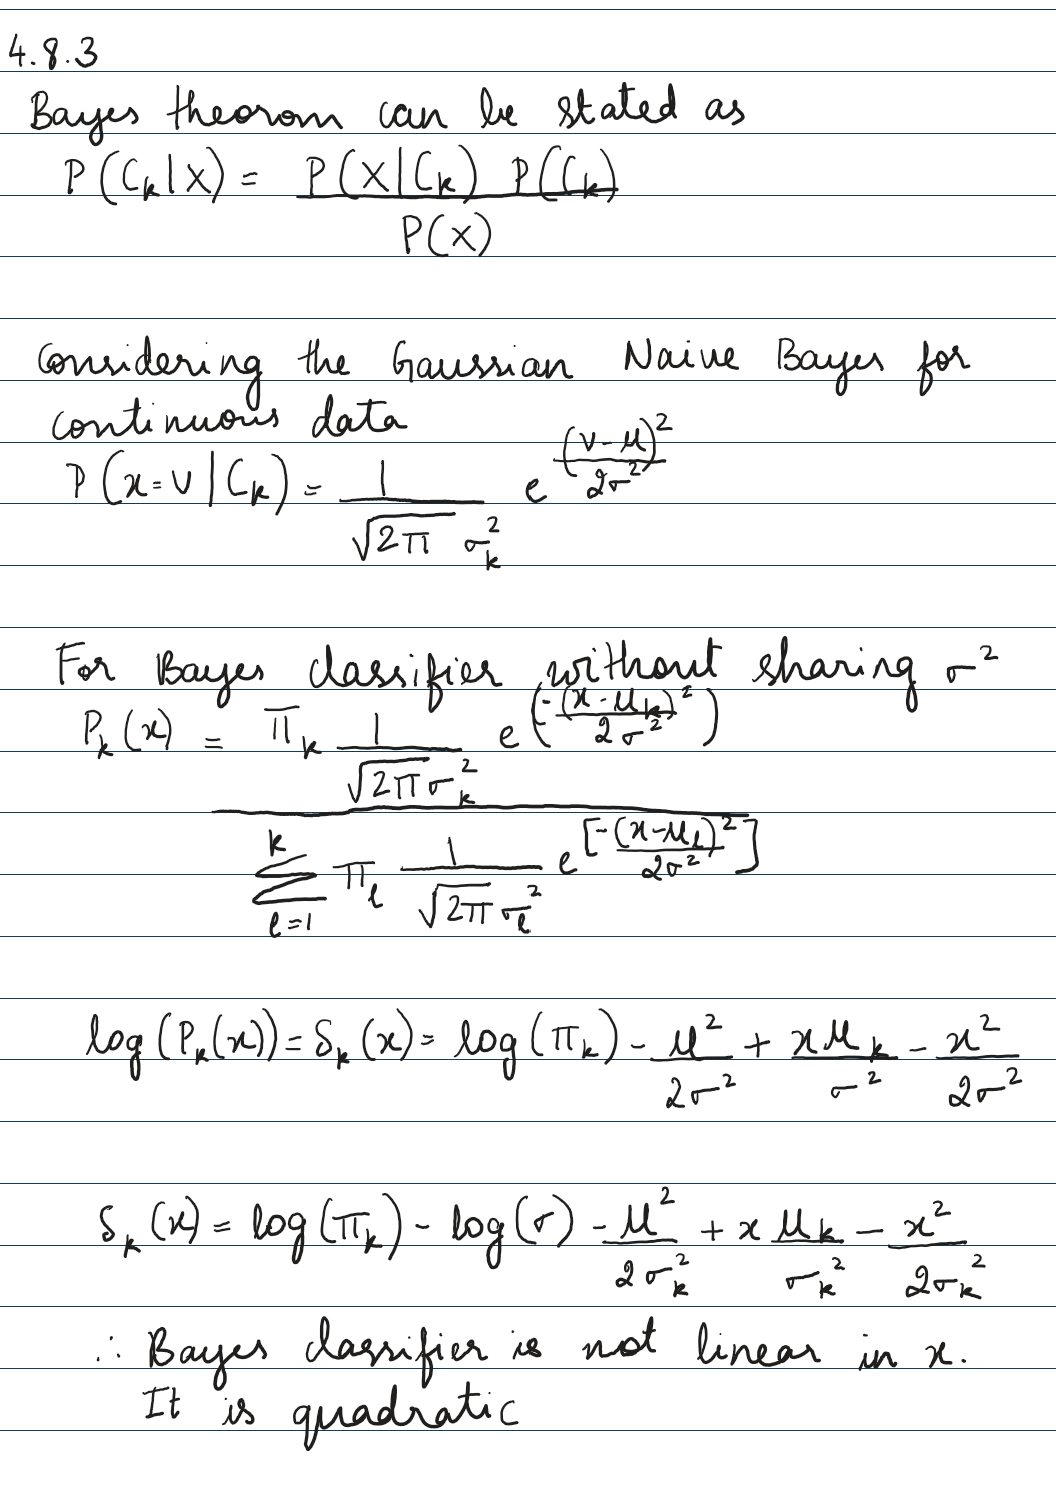

### 4. ISLR, 4.8.7

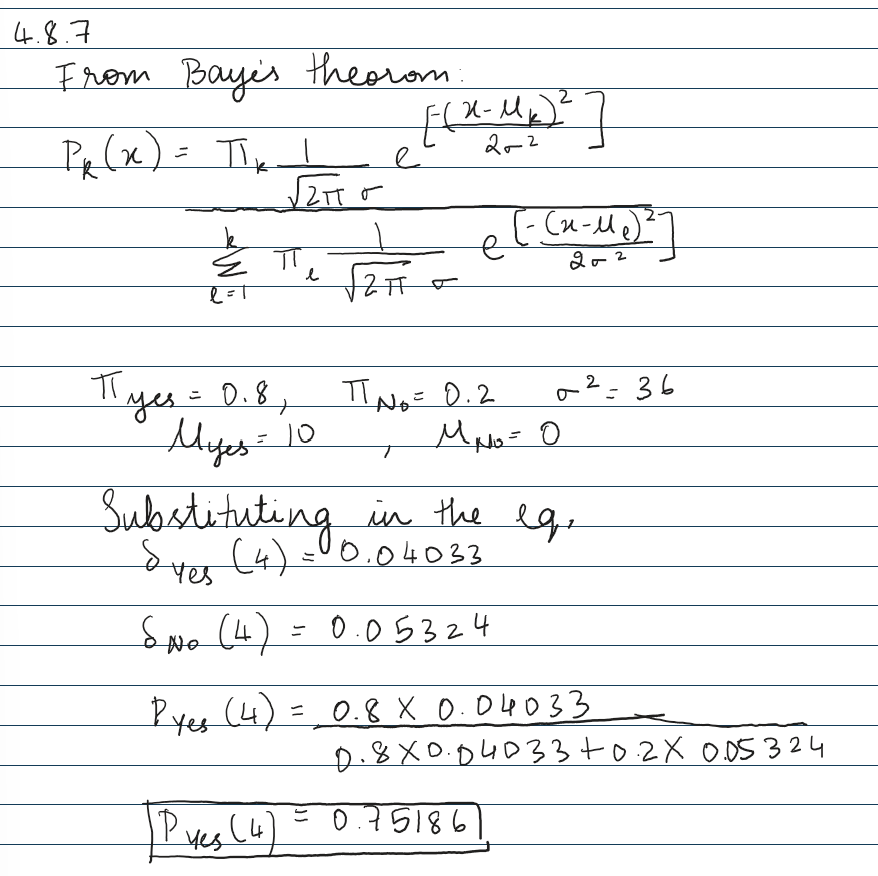